# Imports

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot
from scipy.stats import gamma
import math

# #Deaths Data Cleaning and Visualization

 #Deaths data taken from JHU dataset for NY state
 
https://github.com/CSSEGISandData/COVID-19 

In [0]:
deaths = pd.read_csv("CSE544_Project/deaths.csv")

In [119]:
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4


In [120]:
if 'New York' in deaths['Province_State'].unique():
  print("New York available")

New York available


In [0]:
ny_deaths = deaths.loc[deaths['Province_State'] == 'New York']

In [122]:
ny_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
1833,84036001.0,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",305506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,2,2,6,8,8,8,9,11,11,12,12,14,16,20,20,20,20,20,22,23,23,30,31,31,32,36,36,36,41,44
1834,84036003.0,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",46091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2
1835,84036005.0,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",1418207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1836,84036007.0,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",190488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,3,3,3,3,3,4,4,4,5,5,6,6,6,6,6,6,8,8,8,8,8,9,10,10,11,11,15,17,17,17,19,19,21,22,22
1837,84036009.0,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",76117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
ny_deaths.shape

(64, 113)

In [0]:
# since there are 64 rows of NY state data for different counties, we sum to get the total NY state data
ny_deaths = ny_deaths.groupby(['Province_State']).sum()  

In [125]:
ny_deaths.head()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
New York,5.378406e+09,53760,2405916.0,2637.737383,-4679.399365,23628065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,387,512,659,902,1211,1588,2016,2556,3207,3917,4730,5418,5991,6785,7809,8886,9834,10778,11605,12498,13442,14390,15261,16013,16729,17755,18760,18582,19176,19746,20203,20743,20955,22009,22269,22668,22912,23477,23587,24039


In [0]:
ny_deaths.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Population'], inplace=True, axis=1)

In [127]:
ny_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,387,512,659,902,1211,1588,2016,2556,3207,3917,4730,5418,5991,6785,7809,8886,9834,10778,11605,12498,13442,14390,15261,16013,16729,17755,18760,18582,19176,19746,20203,20743,20955,22009,22269,22668,22912,23477,23587,24039


In [0]:
ny_deaths = ny_deaths.transpose()

In [0]:
ny_deaths.columns = ['#Deaths']

In [130]:
ny_deaths.head()

,#Deaths
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [131]:
# Wanted to work with non-zero data points
ny_deaths_nonZero = ny_deaths.loc[ny_deaths['#Deaths'] > 0]
ny_deaths_nonZero.shape

(51, 1)

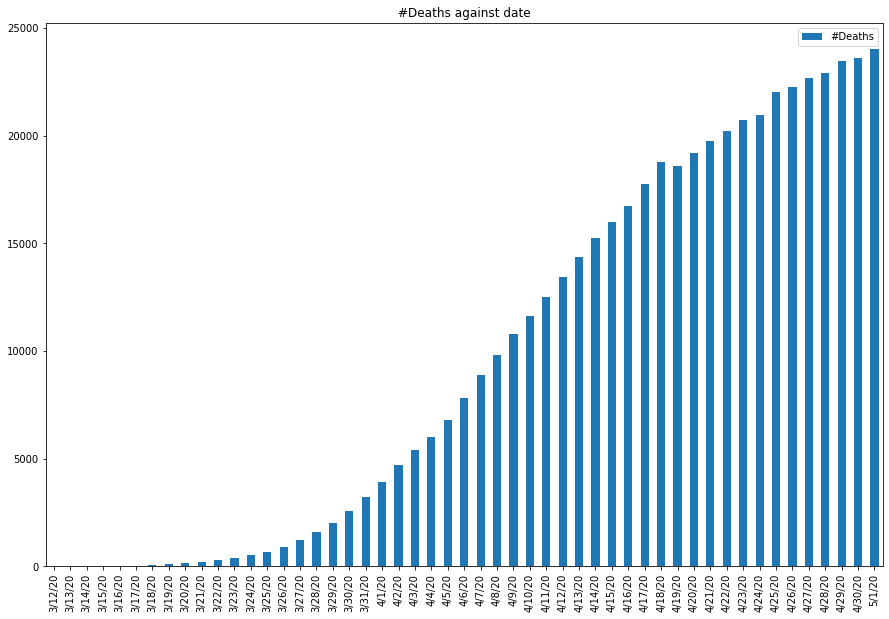

In [132]:
# plotting to see the trend of non-zero #deaths 
ny_deaths_nonZero.plot(kind='bar', figsize=(15,10), title="#Deaths against date")



---


By the graph it was evident that the values were cumulative, so we needed to calculate the #deaths_per_day

Also, we could see there was inconsistency in the data for a day where the cumulative #deaths dropped 


---





In [133]:
ny_deaths_indexed = ny_deaths_nonZero
ny_deaths_indexed['#Deaths_per_day'] = ny_deaths_indexed['#Deaths'].diff().fillna(ny_deaths_indexed['#Deaths'])
ny_deaths_indexed['index'] = np.arange(len(ny_deaths_indexed))  # need the index to access records easily
ny_deaths_indexed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,#Deaths,#Deaths_per_day,index
3/12/20,1,1.0,0
3/13/20,2,1.0,1
3/14/20,6,4.0,2
3/15/20,12,6.0,3
3/16/20,24,12.0,4
3/17/20,38,14.0,5
3/18/20,63,25.0,6
3/19/20,96,33.0,7
3/20/20,151,55.0,8
3/21/20,195,44.0,9


**NOTE:** Since we did not want to deal with negative value in #deaths_per_day and also wanted data with >= 1 #deaths_per_day we have limited our data to a subset from March 12, 2020 to April 18, 2020 which is a total of 38 days, i.e., more than the 30 days requirement.

In [134]:
ny_deaths_cap = ny_deaths_indexed.loc[ny_deaths_indexed['index'] < 38]
ny_deaths_cap

,#Deaths,#Deaths_per_day,index
3/12/20,1,1.0,0
3/13/20,2,1.0,1
3/14/20,6,4.0,2
3/15/20,12,6.0,3
3/16/20,24,12.0,4
3/17/20,38,14.0,5
3/18/20,63,25.0,6
3/19/20,96,33.0,7
3/20/20,151,55.0,8
3/21/20,195,44.0,9


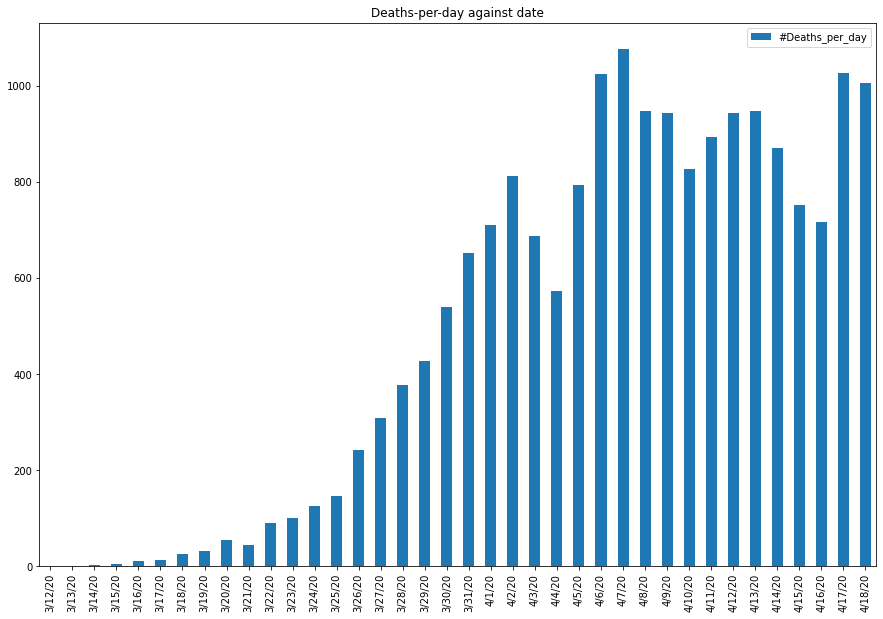

In [135]:
# plot to see the #deaths_per_day
ny_deaths_cap.plot(kind='bar', y='#Deaths_per_day', figsize=(15,10), title="Deaths-per-day against date")



---

We could see there was a continuous increase in #deaths_per_day intially which was followed by alternating dips and peaks/increases.


---





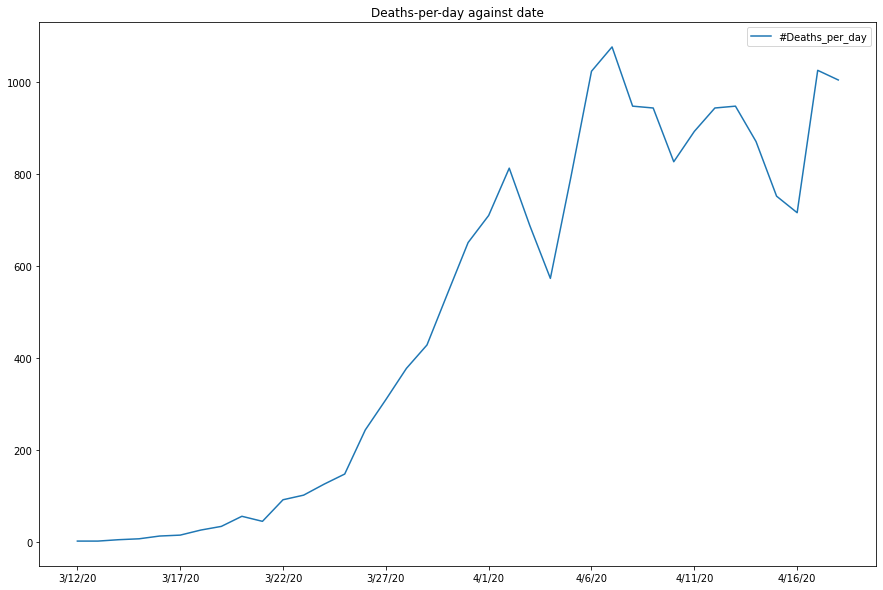

In [136]:
# plotting a line graph
ny_deaths_cap.plot(y='#Deaths_per_day', figsize=(15,10), title="Deaths-per-day against date")



---
The exponential increase follwed by dip, peak and alternating dips and increases is easier to visualize with the line graph.


---






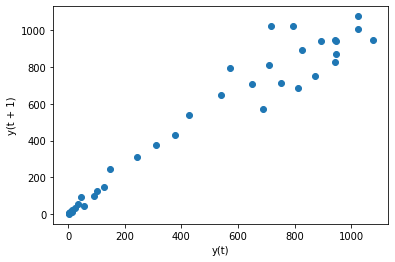

In [137]:
lag_plot(ny_deaths_cap['#Deaths_per_day'])

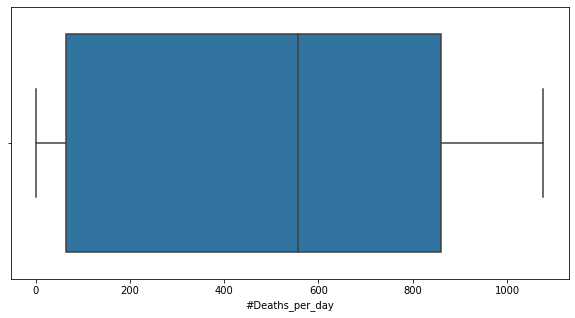

In [138]:
# boxplot
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=ny_deaths_cap['#Deaths_per_day'])



---


The box plot shows there are no outliers and that the median #deaths falls short of 600 for our timeframe.



---



---



## Outlier detection using TUKEY'S Rule 

In [139]:
d_Q1 = ny_deaths_cap['#Deaths_per_day'].quantile(0.25)
d_Q3 = ny_deaths_cap['#Deaths_per_day'].quantile(0.75)
d_IQR = d_Q3 - d_Q1
print("IQR for #deaths_per_day = ", d_IQR)

IQR for #deaths_per_day =  796.0


In [140]:
print((ny_deaths_cap['#Deaths_per_day'] < (d_Q1 - 1.5 * d_IQR)) |(ny_deaths_cap['#Deaths_per_day'] > (d_Q3 + 1.5 * d_IQR)))

3/12/20    False
3/13/20    False
3/14/20    False
3/15/20    False
3/16/20    False
3/17/20    False
3/18/20    False
3/19/20    False
3/20/20    False
3/21/20    False
3/22/20    False
3/23/20    False
3/24/20    False
3/25/20    False
3/26/20    False
3/27/20    False
3/28/20    False
3/29/20    False
3/30/20    False
3/31/20    False
4/1/20     False
4/2/20     False
4/3/20     False
4/4/20     False
4/5/20     False
4/6/20     False
4/7/20     False
4/8/20     False
4/9/20     False
4/10/20    False
4/11/20    False
4/12/20    False
4/13/20    False
4/14/20    False
4/15/20    False
4/16/20    False
4/17/20    False
4/18/20    False
Name: #Deaths_per_day, dtype: bool


No outliers detected using Tukey's rule. So, we do not remove any data point. 

PS: Had already worked on a bunch of inferences with this Outlier result after having confirmed with Anshul, therefore did not change the multiplier value to detect outliers further. 

# #Cases Data Cleaning and Visualization

 #Cases data taken from JHU dataset for NY state
 
https://github.com/CSSEGISandData/COVID-19 

In [0]:
cases = pd.read_csv("CSE544_Project/cases.csv")

In [142]:
cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66


In [143]:
if 'New York' in cases['Province_State'].unique():
  print("New York available")

New York available


In [0]:
ny_cases = cases.loc[cases['Province_State'] == 'New York']

In [145]:
ny_cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
1833,84036001.0,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,146,152,171,187,195,205,217,226,240,253,267,293,305,319,333,342,379,426,446,478,499,535,548,581,619,648,682,687,704,737,758,805,899,948,979,1009,1067,1165,1204
1834,84036003.0,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,6,7,9,10,12,14,16,16,17,17,21,22,26,26,26,26,28,28,28,29,30,30,30,30,30,30,31,35,35,35,35,35,35,35
1835,84036005.0,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1836,84036007.0,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,9,11,16,18,23,29,35,38,42,46,56,65,71,76,86,93,105,112,117,126,133,146,153,167,178,186,192,199,205,219,224,232,251,257,261,266,273,284,299
1837,84036009.0,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,6,6,7,8,9,9,10,12,13,15,17,18,19,28,28,32,32,32,34,34,34,34,35,37,37,39,45,45,45,45,47,47,49


In [146]:
ny_cases.shape

(64, 112)

In [0]:
# since there are 64 rows of NY state data for different counties, we sum to get the total NY state data

ny_cases = ny_cases.groupby(['Province_State']).sum()

In [148]:
ny_cases.head()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
New York,5.378406e+09,53760,2405916.0,2637.737383,-4679.399365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20884,25681,30841,37877,44876,52410,59648,66663,75833,83948,92506,102987,113833,123160,131815,139875,151061,161779,172348,181026,189033,195749,203020,214454,223691,230597,237474,243382,248416,253519,258222,263460,271590,282143,288045,291996,295106,299691,304372,308314


In [0]:
ny_cases.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_'], inplace=True, axis=1)

In [0]:
ny_cases = ny_cases.transpose()

In [0]:
ny_cases.columns = ['#Cases']

In [152]:
ny_cases.head()


,#Cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [153]:
ny_cases.shape

(101, 1)

In [154]:
# Wanted to work with non-zero data points
ny_cases = ny_cases.loc[ny_cases['#Cases'] > 0]
ny_cases.shape

(61, 1)

In [155]:
ny_cases.head()

,#Cases
3/2/20,1
3/3/20,2
3/4/20,11
3/5/20,23
3/6/20,31


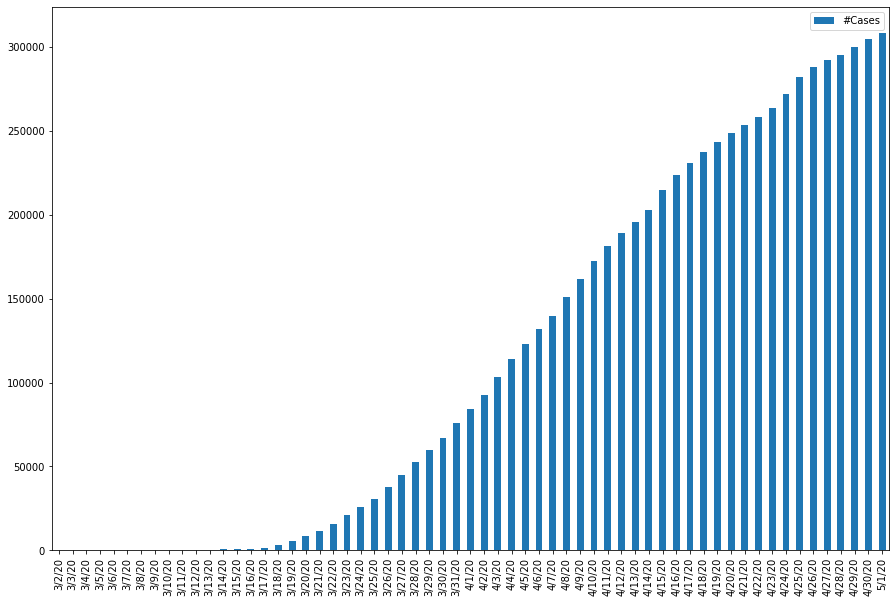

In [156]:
# plotting to see the trend of non-zero #deaths 

ny_cases.plot(kind='bar', figsize = (15,10))



---


By the graph it was evident that the values were cumulative, so we needed to calculate the #cases_per_day

Also, we could see the cumulative data for #cases did not have a drop like we saw in the case of #deaths.


---





In [157]:
ny_cases_indexed = ny_cases
ny_cases_indexed['#Cases_per_day'] = ny_cases_indexed['#Cases'].diff().fillna(ny_cases_indexed['#Cases'])
ny_cases_indexed['index'] = np.arange(len(ny_cases)) # need the index to access records easily
ny_cases_indexed


,#Cases,#Cases_per_day,index
3/2/20,1,1.0,0
3/3/20,2,1.0,1
3/4/20,11,9.0,2
3/5/20,23,12.0,3
3/6/20,31,8.0,4
...,...,...,...
4/27/20,291996,3951.0,56
4/28/20,295106,3110.0,57
4/29/20,299691,4585.0,58
4/30/20,304372,4681.0,59


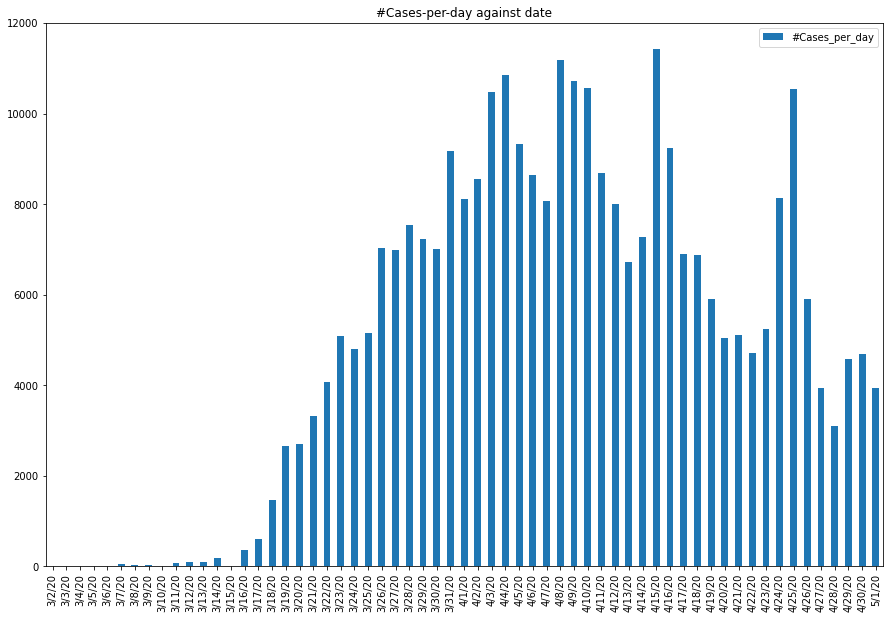

In [158]:
# bar plot to see the #Cases_per_day
ny_cases_indexed.plot(kind='bar', y='#Cases_per_day', figsize=(15,10), title="#Cases-per-day against date")



---

We could see there was a continuous increase in #deaths_per_day intially which was followed by scateered dips and isolated peaks along with being at a similar level for patches in between.


---





**NOTE:** Since we wanted to use corresponding data of #cases_per_day and #deaths_per_day, we extract the data for the same date range as used for #cases_per_day:

In [159]:
# to match the dates with #deaths data
ny_cases_cap = ny_cases_indexed.loc[ny_cases_indexed['index'] > 9]
ny_cases_cap = ny_cases_cap.loc[ny_cases_indexed['index'] < 48]
ny_cases_cap['index'] = np.arange(len(ny_cases_cap))
ny_cases_cap

,#Cases,#Cases_per_day,index
3/12/20,327,107.0,0
3/13/20,421,94.0,1
3/14/20,613,192.0,2
3/15/20,615,2.0,3
3/16/20,967,352.0,4
3/17/20,1578,611.0,5
3/18/20,3038,1460.0,6
3/19/20,5704,2666.0,7
3/20/20,8403,2699.0,8
3/21/20,11727,3324.0,9


In [160]:
ny_cases_cap.shape

(38, 3)

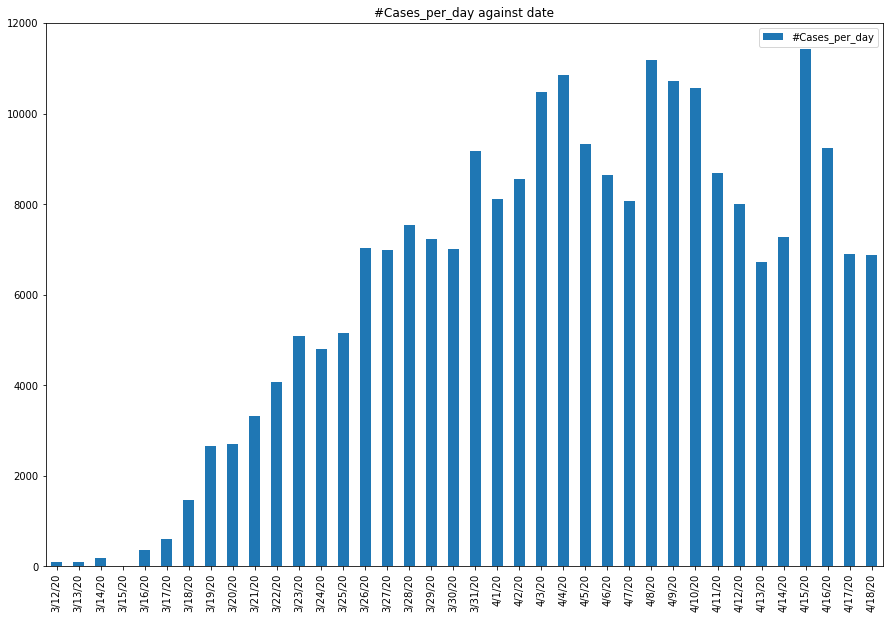

In [161]:
# bar plot to visualize #cases_per_day for the concerned date range 
ny_cases_cap.plot(kind='bar', y='#Cases_per_day', figsize=(15,10), title="#Cases_per_day against date")



---

The trend is similar to what we discussed before.


---





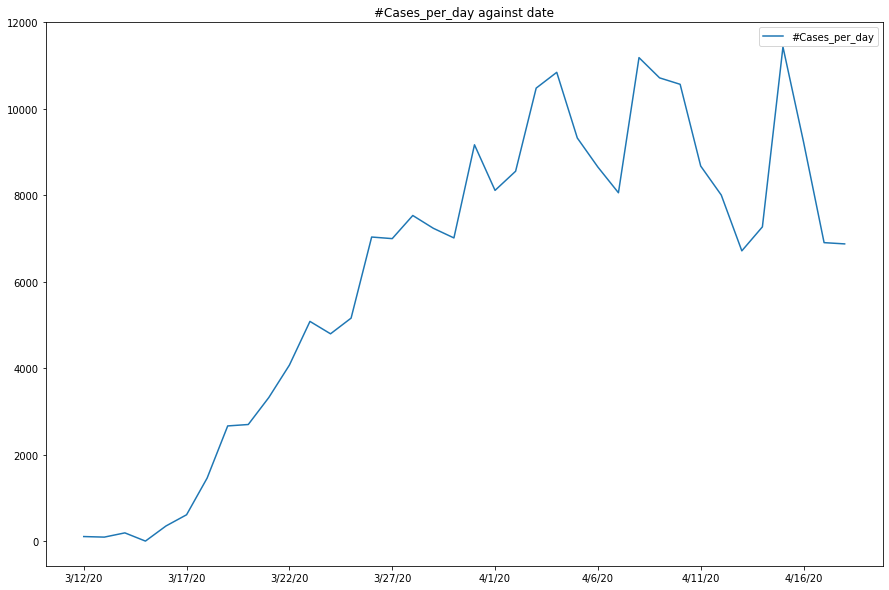

In [162]:
# line plot
ny_cases_cap.plot(y='#Cases_per_day', figsize=(15,10), title="#Cases_per_day against date")



---
The exponential increase follwed by alternating dips and increases is easier to visualize with the line graph.


---






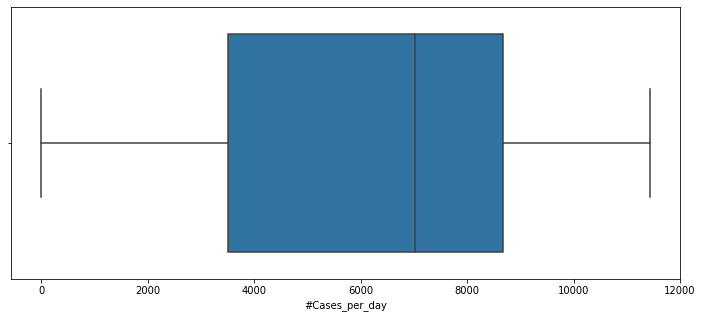

In [163]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=ny_cases_cap['#Cases_per_day'])



---


The box plot shows there are no outliers and that the median #cases lies nearby 7000 for our timeframe.



---



---



## Outlier detection using TUKEY'S Rule 

In [164]:
Q1 = ny_cases_cap['#Cases_per_day'].quantile(0.25)
Q3 = ny_cases_cap['#Cases_per_day'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5161.0


In [165]:
print((ny_cases_cap['#Cases_per_day'] < (Q1 - 1.5 * IQR)) |(ny_cases_cap['#Cases_per_day'] > (Q3 + 1.5 * IQR)))

3/12/20    False
3/13/20    False
3/14/20    False
3/15/20    False
3/16/20    False
3/17/20    False
3/18/20    False
3/19/20    False
3/20/20    False
3/21/20    False
3/22/20    False
3/23/20    False
3/24/20    False
3/25/20    False
3/26/20    False
3/27/20    False
3/28/20    False
3/29/20    False
3/30/20    False
3/31/20    False
4/1/20     False
4/2/20     False
4/3/20     False
4/4/20     False
4/5/20     False
4/6/20     False
4/7/20     False
4/8/20     False
4/9/20     False
4/10/20    False
4/11/20    False
4/12/20    False
4/13/20    False
4/14/20    False
4/15/20    False
4/16/20    False
4/17/20    False
4/18/20    False
Name: #Cases_per_day, dtype: bool


No outliers found using the Tukey's rule. So, we do not remove any data point.

# X Data cleaning and visualization


Data is taken from: https://data.ny.gov/Transportation/Hourly-Traffic-on-Metropolitan-Transportation-Auth/qzve-kjga

Our X data will be limited to the #Vehicles commuting on Throgs Neck Bridge

In [0]:
traffic_data = pd.read_csv("CSE544_Project/X_data.csv")

In [167]:
traffic_data.shape

(1591991, 6)

In [168]:
traffic_data.columns

Index(['Plaza ID', 'Date', 'Hour', 'Direction', '# Vehicles - ETC (E-ZPass)',
       '# Vehicles - Cash/VToll'],
      dtype='object')

In [169]:
traffic_data.isnull().sum()

Plaza ID                      0
Date                          0
Hour                          0
Direction                     0
# Vehicles - ETC (E-ZPass)    0
# Vehicles - Cash/VToll       0
dtype: int64

No nulls found! Data is clean

In [170]:
traffic_data.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll
0,21,05/02/2020,0,I,707,203
1,21,05/02/2020,1,I,409,137
2,21,05/02/2020,2,I,325,110
3,21,05/02/2020,3,I,334,80
4,21,05/02/2020,4,I,452,103


In [171]:
traffic_data.tail()

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll
1591986,11,01/01/2010,19,I,2675,1152
1591987,11,01/01/2010,20,I,2580,1086
1591988,11,01/01/2010,21,I,2302,987
1591989,11,01/01/2010,22,I,2170,910
1591990,11,01/01/2010,23,I,1837,706


![alt text](https://drive.google.com/uc?id=18NbzZyHCk-XyRCxklNgQCNKyGOVV0GMZ)

https://data.ny.gov/Transportation/Daily-Traffic-on-Throgs-Neck-Bridge-Time-Line/emsg-shxw

In [172]:
traffic_data['Plaza ID'].unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  3,  9, 11,  1,  2,  5,  6,
        7,  8,  4])

Per the documentation for the throgs neck bridge we are concerned with Plaza ID 29

In [0]:
throg_neck = pd.DataFrame(traffic_data.loc[traffic_data['Plaza ID'] == 29])

In [174]:
throg_neck.shape

(42420, 6)

In [175]:
throg_neck.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - ETC (E-ZPass),# Vehicles - Cash/VToll
336,29,05/02/2020,0,I,231,58
337,29,05/02/2020,0,O,318,75
338,29,05/02/2020,1,I,179,33
339,29,05/02/2020,1,O,234,56
340,29,05/02/2020,2,I,171,44


In [176]:
throg_neck.dtypes

Plaza ID                       int64
Date                          object
Hour                           int64
Direction                     object
# Vehicles - ETC (E-ZPass)     int64
# Vehicles - Cash/VToll        int64
dtype: object

In [0]:
throg_neck['Date'] = pd.to_datetime(throg_neck['Date'])

In [0]:
throg_neck = throg_neck[['Date','# Vehicles - ETC (E-ZPass)','# Vehicles - Cash/VToll']]

In [0]:
throg_neck['total vehicles'] = throg_neck['# Vehicles - Cash/VToll']+throg_neck['# Vehicles - ETC (E-ZPass)']

In [0]:
throg_neck = throg_neck[['Date','total vehicles']]

In [0]:
throg_neck = throg_neck.groupby([throg_neck['Date']]).sum()

In [182]:
throg_neck.shape

(884, 1)

In [183]:
throg_neck.head()

,total vehicles
Date,
2017-10-22,134475
2017-10-23,118294
2017-10-24,112622
2017-10-25,119233
2017-10-26,121376


In [0]:
throg_neck_dated = throg_neck[(throg_neck.index >= '03/12/2020') & (throg_neck.index <= '04/18/2020')]

In [185]:
throg_neck_dated.head()

,total vehicles
Date,
2020-03-12,110415
2020-03-13,109217
2020-03-14,89902
2020-03-15,78542
2020-03-16,92168


In [186]:
Q1 = np.quantile(throg_neck_dated['total vehicles'],0.25)
Q3 = np.quantile(throg_neck_dated['total vehicles'],0.75)
IQR = Q3 - Q1
  
print((throg_neck_dated['total vehicles'] < (Q1 - 1.5 * IQR)) |(throg_neck_dated['total vehicles'] > (Q3 + 1.5 * IQR)))

Date
2020-03-12     True
2020-03-13     True
2020-03-14     True
2020-03-15     True
2020-03-16     True
2020-03-17     True
2020-03-18     True
2020-03-19     True
2020-03-20     True
2020-03-21    False
2020-03-22    False
2020-03-23    False
2020-03-24    False
2020-03-25    False
2020-03-26    False
2020-03-27    False
2020-03-28    False
2020-03-29     True
2020-03-30    False
2020-03-31    False
2020-04-01    False
2020-04-02    False
2020-04-03    False
2020-04-04    False
2020-04-05     True
2020-04-06    False
2020-04-07    False
2020-04-08    False
2020-04-09    False
2020-04-10    False
2020-04-11    False
2020-04-12    False
2020-04-13    False
2020-04-14    False
2020-04-15    False
2020-04-16    False
2020-04-17    False
2020-04-18    False
Name: total vehicles, dtype: bool


If we consider the total data together, that essentially leads to 11 of 38 entries to be classified as outliers. Given the nature of data we are going ahead with weekly detection and removal of outliers[discussed this with Professor]

In [0]:
throg_neck_2019 = throg_neck[(throg_neck.index >= '03/12/2019') & (throg_neck.index <= '04/18/2019')]

In [188]:
throg_neck_2019.shape

(38, 1)

In [0]:
throg_neck_2020 = throg_neck[(throg_neck.index >= '03/12/2020') & (throg_neck.index <= '04/18/2020')]

In [190]:
throg_neck_2020.shape

(38, 1)

In [0]:
# Convert data to weekly frequency
def convert_data_to_weekly(data):
  return_list = []
  i = 0
  while (i<len(data)):
    return_list.append(data[i:i+7])
    i = i+7
  return return_list

throg_neck_2019_weekly = convert_data_to_weekly(throg_neck_2019)
throg_neck_2020_weekly = convert_data_to_weekly(throg_neck_2020)

In [192]:
# detect outlier and remove them

# for 2019's data 
for week in throg_neck_2019_weekly:
  # print(week)
  Q1_week = np.quantile(week,0.25)
  Q3_week = np.quantile(week,0.75)
  IQR_week = Q3_week - Q1_week
  print("IQR: ",IQR_week)
  print((week < (Q1_week - 1.5 * IQR_week)) |(week > (Q3_week + 1.5 * IQR_week)))
  # week.boxplot()
  # plt.show()

IQR:  5210.5
            total vehicles
Date                      
2019-03-12           False
2019-03-13           False
2019-03-14           False
2019-03-15           False
2019-03-16           False
2019-03-17           False
2019-03-18           False
IQR:  4452.5
            total vehicles
Date                      
2019-03-19           False
2019-03-20           False
2019-03-21           False
2019-03-22           False
2019-03-23           False
2019-03-24           False
2019-03-25           False
IQR:  5963.5
            total vehicles
Date                      
2019-03-26           False
2019-03-27           False
2019-03-28           False
2019-03-29           False
2019-03-30           False
2019-03-31           False
2019-04-01           False
IQR:  10411.0
            total vehicles
Date                      
2019-04-02           False
2019-04-03           False
2019-04-04           False
2019-04-05           False
2019-04-06           False
2019-04-07           False
20

In [193]:
# detect outlier and remove them

# for 2020's data 
for week in throg_neck_2020_weekly:
  Q1_week = np.quantile(week,0.25)
  Q3_week = np.quantile(week,0.75)
  IQR_week = Q3_week - Q1_week
  print("IQR: ",IQR_week)
  print((week < (Q1_week - 1.5 * IQR_week)) |(week > (Q3_week + 1.5 * IQR_week)))

IQR:  13719.5
            total vehicles
Date                      
2020-03-12           False
2020-03-13           False
2020-03-14           False
2020-03-15           False
2020-03-16           False
2020-03-17           False
2020-03-18           False
IQR:  15473.0
            total vehicles
Date                      
2020-03-19           False
2020-03-20           False
2020-03-21           False
2020-03-22           False
2020-03-23           False
2020-03-24           False
2020-03-25           False
IQR:  10950.0
            total vehicles
Date                      
2020-03-26           False
2020-03-27           False
2020-03-28           False
2020-03-29           False
2020-03-30           False
2020-03-31           False
2020-04-01           False
IQR:  7957.5
            total vehicles
Date                      
2020-04-02           False
2020-04-03           False
2020-04-04           False
2020-04-05            True
2020-04-06           False
2020-04-07           False


Outlier 5th April observed. Removing the data from both 2019 and 2020 data. Can remove it since it's (1/38)*100 = 2.63% of data

In [194]:
print(throg_neck_2019.index[24])

2019-04-05 00:00:00


In [0]:
throg_neck_2019 = throg_neck_2019.drop(throg_neck_2019.index[24])
throg_neck_2020 = throg_neck_2020.drop(throg_neck_2020.index[24])

In [0]:
throg_neck_2019_weekly = convert_data_to_weekly(throg_neck_2019)
throg_neck_2020_weekly = convert_data_to_weekly(throg_neck_2020)

In [197]:
print(len(throg_neck_2019_weekly))
print(len(throg_neck_2020_weekly))

6
6


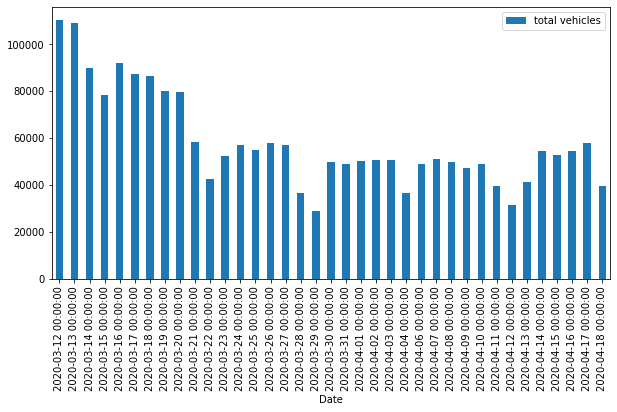

In [198]:
throg_neck_2020.plot(kind='bar',y='total vehicles',figsize=(10,5))

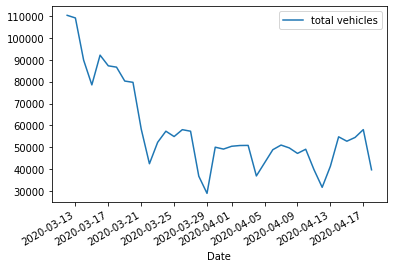

In [199]:
throg_neck_2020.plot()

The histogram and the line chart both show significant drop in the period of covid-19

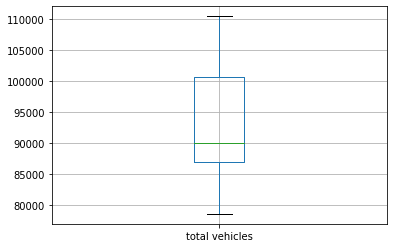

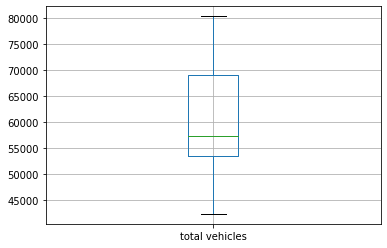

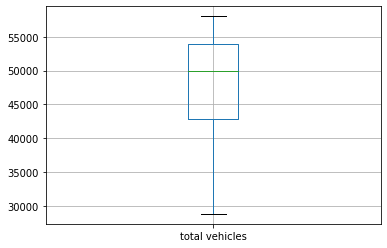

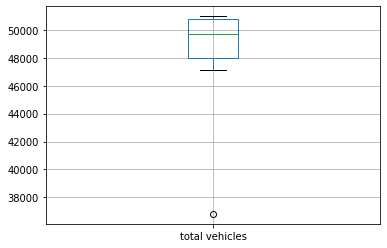

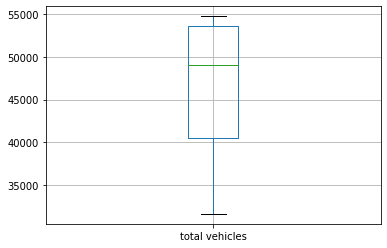

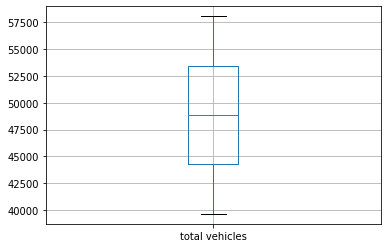

In [200]:
for week in throg_neck_2020_weekly:
  week.boxplot()
  plt.show()

Box plot shows that the outlier removal was successful and hence their are no points outside the maximum

# Required Inference 1

Use your COVID19 dataset to predict the COVID19 fatality and #cases for the next one week. Use the following four prediction techniques: (i) AR(3), (ii) AR(5), (iii) EWMA with alpha = 0.5, and (iv) EWMA with alpha = 0.8. Make sure that your dataset allows you to verify the one week prediction. For example, use the first three weeks of data to predict the fourth week, and report the accuracy of your predictions using the actual fourth week data. Use metrics learned in class (MAPE as a % and MSE) to report accuracy numbers.


## MAPE and MSE

In [0]:
def calculate_mse(Y, Y_hat):
  return np.sum(np.square(Y-Y_hat))/len(Y)

def calculate_MAPE(Y, Y_hat):
  return np.sum(((np.absolute(Y-Y_hat))/Y)*100)/len(Y)

## EWMA

**Observation**: We could see from below execution that MSE and MAPE were high hence inferring that the data varies a lot from the predictions.

***Setting variables for #cases data:***

In [202]:
ny_cases_cap

,#Cases,#Cases_per_day,index
3/12/20,327,107.0,0
3/13/20,421,94.0,1
3/14/20,613,192.0,2
3/15/20,615,2.0,3
3/16/20,967,352.0,4
3/17/20,1578,611.0,5
3/18/20,3038,1460.0,6
3/19/20,5704,2666.0,7
3/20/20,8403,2699.0,8
3/21/20,11727,3324.0,9


In [203]:
pdc = ny_cases_cap['#Cases_per_day'].reset_index(drop = True)  # getting the per_day_cases
X = pdc[:len(pdc)-7]      # using all data except last week for prediction         
Y = pdc[len(pdc)-7:]      # This is the actual Y for last week
Y = np.array([Y]).T 
Y = Y.squeeze()
Y_hat = np.array([])      # This is the predicted Y_hat for last week
print("Y = ", Y)
print("shape of Y = ", Y.shape)
print("initial Y_hat = ", Y_hat)
print("shape of Y_hat = ", Y_hat.shape)
X = np.array([X]).T   
X = np.insert(X, 0, X[0], axis=0)   # Adding y_1_hat as y_1 
X = np.flip(X)  # Flipping to get in the order of y_t, y_t-1,....,y_1
X = X.squeeze()
Y_31 = X[0]   # saving the true value of Y_31
X = X[1:]     # removing Y_31 to calculare y_hat(31|30)
              # Y31_hat is needed to start the predictions of last week (32-38)
print("X = ", X)
print(" shape of X = ", X.shape)
print("Y_31 = ", Y_31)

Y =  [ 8007.  6716.  7271. 11434.  9237.  6906.  6877.]
shape of Y =  (7,)
initial Y_hat =  []
shape of Y_hat =  (0,)
X =  [1.0569e+04 1.0718e+04 1.1186e+04 8.0600e+03 8.6550e+03 9.3270e+03
 1.0846e+04 1.0481e+04 8.5580e+03 8.1150e+03 9.1700e+03 7.0150e+03
 7.2380e+03 7.5340e+03 6.9990e+03 7.0360e+03 5.1600e+03 4.7970e+03
 5.0840e+03 4.0730e+03 3.3240e+03 2.6990e+03 2.6660e+03 1.4600e+03
 6.1100e+02 3.5200e+02 2.0000e+00 1.9200e+02 9.4000e+01 1.0700e+02
 1.0700e+02]
 shape of X =  (31,)
Y_31 =  8678.0


***Setting variables for #deaths data:***

In [204]:
ny_deaths_cap

,#Deaths,#Deaths_per_day,index
3/12/20,1,1.0,0
3/13/20,2,1.0,1
3/14/20,6,4.0,2
3/15/20,12,6.0,3
3/16/20,24,12.0,4
3/17/20,38,14.0,5
3/18/20,63,25.0,6
3/19/20,96,33.0,7
3/20/20,151,55.0,8
3/21/20,195,44.0,9


In [205]:
pdd = ny_deaths_cap['#Deaths_per_day'].reset_index(drop = True)  # getting the per_day_deaths
X_deaths = pdd[:len(pdd)-7]      # using all data except last week for prediction                           
Y_deaths = pdd[len(pdd)-7:]      # This is the actual Y for last week
Y_deaths = np.array([Y_deaths]).T 
Y_deaths = Y_deaths.squeeze()
Y_hat_deaths = np.array([])      # This is the predicted Y_hat for last week
print("Y for #deaths = ", Y_deaths)
print("shape of Y = ", Y_deaths.shape)
print("initial Y_hat = ", Y_hat_deaths)
print("shape of Y_hat = ", Y_hat_deaths.shape)
X_deaths = np.array([X_deaths]).T   
X_deaths = np.insert(X_deaths, 0, X_deaths[0], axis=0)   # Adding y_1_hat as y_1 
X_deaths = np.flip(X_deaths)  # Flipping to get in the order of y_t, y_t-1,....,y_1
X_deaths = X_deaths.squeeze()
Y_deaths_31 = X_deaths[0]   # saving the true value of Y_31
X_deaths = X_deaths[1:]     # removing Y_31 to calculare y_hat(31|30)
              # Y31_hat is needed to start the predictions of last week (32-38)
print("X for #deaths = ", X_deaths)
print(" shape of X = ", X_deaths.shape)
print("Y_31 for #deaths = ", Y_deaths_31)

Y for #deaths =  [ 944.  948.  871.  752.  716. 1026. 1005.]
shape of Y =  (7,)
initial Y_hat =  []
shape of Y_hat =  (0,)
X for #deaths =  [8.270e+02 9.440e+02 9.480e+02 1.077e+03 1.024e+03 7.940e+02 5.730e+02
 6.880e+02 8.130e+02 7.100e+02 6.510e+02 5.400e+02 4.280e+02 3.770e+02
 3.090e+02 2.430e+02 1.470e+02 1.250e+02 1.010e+02 9.100e+01 4.400e+01
 5.500e+01 3.300e+01 2.500e+01 1.400e+01 1.200e+01 6.000e+00 4.000e+00
 1.000e+00 1.000e+00 1.000e+00]
 shape of X =  (31,)
Y_31 for #deaths =  893.0


Y_hat (t+1 | t) = sum(W*X) ,

 W = [alpha, aplha(1-alpha), alpha(1-alpha)^2, .... alpha(1-alpha)^t-1, (1-alpha)^t],


 X = [y_t, y_t-1, ..., y_1, y_1_hat]

 here,

 Yhat(31|30) = sum(W*X) and

 W = [alpha, aplha(1-alpha), alpha(1-alpha)^2, .... alpha(1-alpha)^29, (1-alpha)^30]

 X = [y_30, y_29, ...., y_2, y_1, y_1]

 Post this, we calculate Y_hat (32|31), .... Y_hat (38|37)

where Y_hat (32|31) = (32nd day prediction given #cases_per_day for 31 days)

and so on.


y_hat (t+1|t) = alpha * y_t + (1-alpha) * y_hat (t+1|t)

that is:

y_hat (32|31) = alpha * y_31 + (1-alpha) * y_hat (31|3)

...

y_hat (38|37) = alpha * y_37 + (1-alpha) * y_hat (37|36)

In [0]:
def build_W(alpha, X):
  W = np.arange(len(X)-1)
  W = alpha * ((1-alpha) ** W)
  print(W.shape)
  W = np.append(W, (1-alpha)**(len(X)-1))  #appending the last term of alpha
  print(W.shape)
  return W


In [0]:
def ewma(alpha, Y, Y_hat, W, X):    
  Y31_hat = np.sum(W * X)   # needed to start the prediction of the last week
                            # but will not be used in MAPE and MSE calculations
  print("Y31_hat = ", Y31_hat)

  Y32_hat = np.sum((alpha*Y_31) + (1-alpha)*Y31_hat)  
  print("Y_32 predicted = ", Y32_hat)
  Y_hat = np.append(Y_hat, Y32_hat)  
  Y33_hat = np.sum((alpha*Y[0]) + (1-alpha)*Y_hat[0])
  print("Y_33 predicted = ", Y33_hat)
  Y_hat = np.append(Y_hat, Y33_hat)
  Y34_hat = np.sum((alpha*Y[1]) + (1-alpha)*Y_hat[1])
  print("Y_33 predicted = ", Y34_hat)
  Y_hat = np.append(Y_hat, Y34_hat)
  Y35_hat = np.sum((alpha*Y[2]) + (1-alpha)*Y_hat[2])
  print("Y_34 predicted = ", Y35_hat)
  Y_hat = np.append(Y_hat, Y35_hat)
  Y36_hat = np.sum((alpha*Y[3]) + (1-alpha)*Y_hat[3])
  print("Y_35 predicted = ", Y36_hat)
  Y_hat = np.append(Y_hat, Y36_hat)
  Y37_hat = np.sum((alpha*Y[4]) + (1-alpha)*Y_hat[4])
  print("Y_36 predicted = ", Y37_hat)
  Y_hat = np.append(Y_hat, Y37_hat)
  Y38_hat = np.sum((alpha*Y[5]) + (1-alpha)*Y_hat[5])
  print("Y_37 predicted = ", Y38_hat)
  Y_hat = np.append(Y_hat, Y38_hat)
  print("Y_hat [32-38] = ", Y_hat)
  print("actual Y [32-38] = ", Y)
  return Y_hat

### EWMA (alpha =0.5)

#### For #cases

In [208]:
Y_hat = np.array([])
W = build_W(0.5, X)
Y_hat = ewma(0.5, Y, Y_hat, W, X)

(30,)
(31,)
Y31_hat =  10440.446983339265
Y_32 predicted =  9559.223491669632
Y_33 predicted =  8783.111745834816
Y_33 predicted =  7749.555872917408
Y_34 predicted =  7510.277936458704
Y_35 predicted =  9472.138968229352
Y_36 predicted =  9354.569484114676
Y_37 predicted =  8130.284742057338
Y_hat [32-38] =  [9559.22349167 8783.11174583 7749.55587292 7510.27793646 9472.13896823
 9354.56948411 8130.28474206]
actual Y [32-38] =  [ 8007.  6716.  7271. 11434.  9237.  6906.  6877.]


##### Calculate MAPE and MSE for EWMA(alpha=0.5)

In [209]:
print("MAPE with EWMA (alpha = 0.5) = ", calculate_MAPE(Y,Y_hat))
print("MSE with EWMA (alpha = 0.5) = ", calculate_mse(Y,Y_hat))

MAPE with EWMA (alpha = 0.5) =  21.041187987816038
MSE with EWMA (alpha = 0.5) =  4275494.97012502


#### For #deaths

In [210]:
Y_hat_deaths = np.array([])
W_deaths = build_W(0.5, X_deaths)
Y_hat_deaths = ewma(0.5, Y_deaths, Y_hat_deaths, W_deaths, X_deaths)

(30,)
(31,)
Y31_hat =  889.7040816582739
Y_32 predicted =  4783.852040829137
Y_33 predicted =  2863.9260204145685
Y_33 predicted =  1905.9630102072842
Y_34 predicted =  1388.4815051036421
Y_35 predicted =  1070.240752551821
Y_36 predicted =  893.1203762759105
Y_37 predicted =  959.5601881379553
Y_hat [32-38] =  [4783.85204083 2863.92602041 1905.96301021 1388.4815051  1070.24075255
  893.12037628  959.56018814]
actual Y [32-38] =  [ 944.  948.  871.  752.  716. 1026. 1005.]


##### Calculate MAPE and MSE for EWMA(alpha=0.5)

In [211]:
print("MAPE with EWMA (alpha = 0.5) = ", calculate_MAPE(Y_deaths,Y_hat_deaths))
print("MSE with EWMA (alpha = 0.5) = ", calculate_mse(Y_deaths,Y_hat_deaths))

MAPE with EWMA (alpha = 0.5) =  125.61094883754765
MSE with EWMA (alpha = 0.5) =  2862385.9473813153


### EWMA (alpha = 0.8)

#### For #cases

In [212]:
Y_hat = np.array([])
W = build_W(0.8, X)
Y_hat = ewma(0.8, Y, Y_hat, W, X)

(30,)
(31,)
Y31_hat =  10593.766499258294
Y_32 predicted =  9061.15329985166
Y_33 predicted =  8217.830659970332
Y_33 predicted =  7016.366131994066
Y_34 predicted =  7220.073226398813
Y_35 predicted =  10591.214645279762
Y_36 predicted =  9507.842929055952
Y_37 predicted =  7426.36858581119
Y_hat [32-38] =  [ 9061.15329985  8217.83065997  7016.36613199  7220.0732264
 10591.21464528  9507.84292906  7426.36858581]
actual Y [32-38] =  [ 8007.  6716.  7271. 11434.  9237.  6906.  6877.]


##### Calculate MAPE and MSE for EWMA(alpha=0.8)

In [213]:
print("MAPE with EWMA (alpha = 0.8) = ", calculate_MAPE(Y,Y_hat))
print("MSE with EWMA (alpha = 0.8) = ", calculate_mse(Y,Y_hat))

MAPE with EWMA (alpha = 0.8) =  19.458305817442902
MSE with EWMA (alpha = 0.8) =  4299148.792409782


#### For #deaths

In [214]:
Y_hat_deaths = np.array([])
W_deaths = build_W(0.8, X_deaths)
Y_hat_deaths = ewma(0.8, Y_deaths, Y_hat_deaths, W_deaths, X_deaths)

(30,)
(31,)
Y31_hat =  851.4211864346197
Y_32 predicted =  7112.684237286924
Y_33 predicted =  2177.7368474573846
Y_33 predicted =  1193.9473694914768
Y_34 predicted =  935.5894738982954
Y_35 predicted =  788.7178947796591
Y_36 predicted =  730.5435789559318
Y_37 predicted =  966.9087157911864
Y_hat [32-38] =  [7112.68423729 2177.73684746 1193.94736949  935.5894739   788.71789478
  730.54357896  966.90871579]
actual Y [32-38] =  [ 944.  948.  871.  752.  716. 1026. 1005.]


##### Calculate MAPE and MSE for EWMA(alpha=0.8)

In [215]:
print("MAPE with EWMA (alpha = 0.8) = ", calculate_MAPE(Y_deaths,Y_hat_deaths))
print("MSE with EWMA (alpha = 0.8) = ", calculate_mse(Y_deaths,Y_hat_deaths))

MAPE with EWMA (alpha = 0.8) =  126.77369760969366
MSE with EWMA (alpha = 0.8) =  5685278.76666062


## AR(3)

**Observation**: We could see from below execution that MSE and MAPE were high hence inferring that the data varies a lot from the predictions.

***Setting variables for #cases data:***

In [216]:
pdc = ny_cases_cap['#Cases_per_day'].reset_index(drop = True)  # getting the per_day_cases
X_ar = pdc[:len(pdc)-7]      # using all data except last week's for prediction
X_ar = np.array([X_ar]).T 
X_ar = X_ar.squeeze()
Y_ar = pdc[len(pdc)-7:]      # This is the actual Y for last week
Y_ar = np.array([Y_ar]).T 
Y_ar = Y_ar.squeeze()
Y_hat_ar = np.array([])      # This is the predicted Y_hat for last week
print("Y for AR = ", Y_ar)
print("shape of Y = ", Y_ar.shape)
print("initial Y_hat = ", Y_hat_ar)
print("shape of Y_hat = ", Y_hat_ar.shape)

# building the training data (y_t; y_t-1, y_t-2, y_t-3)
X_train = np.zeros([len(X_ar)-3, 4])
print("X train = ", X_train.shape)
for i in range(3, len(X_ar)):
  X_train[i-3] = [1, X_ar[i-1], X_ar[i-2], X_ar[i-3]]    
print("X train = ", X_train)
print(" shape of X = ", X_train.shape)
Y_train = X_ar[3:]
print("Y train = ", Y_train)
print("shape of Y train = ", Y_train.shape)

Y for AR =  [ 8007.  6716.  7271. 11434.  9237.  6906.  6877.]
shape of Y =  (7,)
initial Y_hat =  []
shape of Y_hat =  (0,)
X train =  (28, 4)
X train =  [[1.0000e+00 1.9200e+02 9.4000e+01 1.0700e+02]
 [1.0000e+00 2.0000e+00 1.9200e+02 9.4000e+01]
 [1.0000e+00 3.5200e+02 2.0000e+00 1.9200e+02]
 [1.0000e+00 6.1100e+02 3.5200e+02 2.0000e+00]
 [1.0000e+00 1.4600e+03 6.1100e+02 3.5200e+02]
 [1.0000e+00 2.6660e+03 1.4600e+03 6.1100e+02]
 [1.0000e+00 2.6990e+03 2.6660e+03 1.4600e+03]
 [1.0000e+00 3.3240e+03 2.6990e+03 2.6660e+03]
 [1.0000e+00 4.0730e+03 3.3240e+03 2.6990e+03]
 [1.0000e+00 5.0840e+03 4.0730e+03 3.3240e+03]
 [1.0000e+00 4.7970e+03 5.0840e+03 4.0730e+03]
 [1.0000e+00 5.1600e+03 4.7970e+03 5.0840e+03]
 [1.0000e+00 7.0360e+03 5.1600e+03 4.7970e+03]
 [1.0000e+00 6.9990e+03 7.0360e+03 5.1600e+03]
 [1.0000e+00 7.5340e+03 6.9990e+03 7.0360e+03]
 [1.0000e+00 7.2380e+03 7.5340e+03 6.9990e+03]
 [1.0000e+00 7.0150e+03 7.2380e+03 7.5340e+03]
 [1.0000e+00 9.1700e+03 7.0150e+03 7.2380e+03]

***Setting variables for #deaths data:***

In [217]:
pdd = ny_deaths_cap['#Deaths_per_day'].reset_index(drop = True)  # getting the per_day_deaths
X_ar_deaths = pdd[:len(pdd)-7]      # using all data except last week's for prediction
X_ar_deaths = np.array([X_ar_deaths]).T 
X_ar_deaths = X_ar_deaths.squeeze()
Y_ar_deaths = pdd[len(pdd)-7:]      # This is the actual Y for last week
Y_ar_deaths = np.array([Y_ar_deaths]).T 
Y_ar_deaths = Y_ar_deaths.squeeze()
Y_hat_ar_deaths = np.array([])      # This is the predicted Y_hat for last week
print("Y for AR = ", Y_ar_deaths)
print("shape of Y = ", Y_ar_deaths.shape)
print("initial Y_hat = ", Y_hat_ar_deaths)
print("shape of Y_hat = ", Y_hat_ar_deaths.shape)

# building the training data (y_t; y_t-1, y_t-2, y_t-3)
X_train_deaths = np.zeros([len(X_ar_deaths)-3, 4])
print("X train for #deaths = ", X_train_deaths.shape)
for i in range(3, len(X_ar_deaths)):
  X_train_deaths[i-3] = [1, X_ar_deaths[i-1], X_ar_deaths[i-2], X_ar_deaths[i-3]]  
print("X train for #deaths = ", X_train_deaths)
print(" shape of X = ", X_train_deaths.shape)
Y_train_deaths = X_ar_deaths[3:]
print("Y train for #deaths = ", Y_train_deaths)
print("shape of Y train = ", Y_train_deaths.shape)

Y for AR =  [ 944.  948.  871.  752.  716. 1026. 1005.]
shape of Y =  (7,)
initial Y_hat =  []
shape of Y_hat =  (0,)
X train for #deaths =  (28, 4)
X train for #deaths =  [[1.000e+00 4.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 6.000e+00 4.000e+00 1.000e+00]
 [1.000e+00 1.200e+01 6.000e+00 4.000e+00]
 [1.000e+00 1.400e+01 1.200e+01 6.000e+00]
 [1.000e+00 2.500e+01 1.400e+01 1.200e+01]
 [1.000e+00 3.300e+01 2.500e+01 1.400e+01]
 [1.000e+00 5.500e+01 3.300e+01 2.500e+01]
 [1.000e+00 4.400e+01 5.500e+01 3.300e+01]
 [1.000e+00 9.100e+01 4.400e+01 5.500e+01]
 [1.000e+00 1.010e+02 9.100e+01 4.400e+01]
 [1.000e+00 1.250e+02 1.010e+02 9.100e+01]
 [1.000e+00 1.470e+02 1.250e+02 1.010e+02]
 [1.000e+00 2.430e+02 1.470e+02 1.250e+02]
 [1.000e+00 3.090e+02 2.430e+02 1.470e+02]
 [1.000e+00 3.770e+02 3.090e+02 2.430e+02]
 [1.000e+00 4.280e+02 3.770e+02 3.090e+02]
 [1.000e+00 5.400e+02 4.280e+02 3.770e+02]
 [1.000e+00 6.510e+02 5.400e+02 4.280e+02]
 [1.000e+00 7.100e+02 6.510e+02 5.400e+02]
 [1.000e+00

In [0]:
def calculate_beta_hat(X_train, Y_train):
  return (np.linalg.inv((X_train.T).dot(X_train))).dot((X_train.T).dot(Y_train))

In [0]:
def calculate_yhat_ar3(beta_hat, y1, y2, y3):
  return beta_hat[0] + beta_hat[1]*y1 + beta_hat[2]*y2 + beta_hat[3]*y3

### For #cases

#### Calculate Y_hat (32|31)

Y_hat (t+1|t) = beta0_hat + beta1_hat*y_t + beta2_hat*y_t-1 + beta3_hat*y_t-2 

In [220]:
beta_hat = calculate_beta_hat(X_train, Y_train)
print("beta_hat = ", beta_hat)

beta_hat =  [ 9.65553096e+02  7.38815411e-01 -4.38058427e-02  2.21609092e-01]


In [221]:
Y_hat_ar = np.array([])
Y32_hat_ar = calculate_yhat_ar3(beta_hat, Y_train[27], Y_train[26], Y_train[25])
Y_hat_ar = np.append(Y_hat_ar, Y32_hat_ar)
print("Y32 predicted = ", Y32_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

Y32 predicted =  9289.215531201979
modified Y_hat =  [9289.2155312]


##### Calculate Y_hat(33|32) , ..., Y_hat(38|37)
use the next seen data to calculate beta_hat, in turn use the newly calculated beta_hat to predict Y_hat (33|32)

In [0]:
def ar_next_step(i, Y_train, X_train, beta_hat):
  Y_train = np.append(Y_train, Y_ar[i])
  print("new Y_train's shape = ", Y_train.shape)
  X_train = np.vstack([X_train, [1, Y_train[len(Y_train)-2], Y_train[len(Y_train)-3], Y_train[len(Y_train)-4]]])
  print("new X_train's shape = ", X_train.shape)
  beta_hat = calculate_beta_hat(X_train, Y_train)
  print("new beta_hat = ", beta_hat)
  return Y_train, X_train, beta_hat

In [223]:
Y_train, X_train, beta_hat = ar_next_step(0, Y_train, X_train, beta_hat)
Y33_hat_ar = calculate_yhat_ar3(beta_hat, Y_train[len(Y_train)-1], Y_train[len(Y_train)-2], Y_train[len(Y_train)-3])
Y_hat_ar = np.append(Y_hat_ar, Y33_hat_ar)
print("Y33 predicted = ", Y33_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (29,)
new X_train's shape =  (29, 4)
new beta_hat =  [ 9.41066794e+02  8.20962640e-01 -9.62351056e-02  1.82060823e-01]
Y33 predicted =  8603.587243188023
modified Y_hat =  [9289.2155312  8603.58724319]


In [224]:
Y_train, X_train, beta_hat = ar_next_step(1, Y_train, X_train, beta_hat)
Y34_hat_ar = calculate_yhat_ar3(beta_hat, Y_train[len(Y_train)-1], Y_train[len(Y_train)-2], Y_train[len(Y_train)-3])
Y_hat_ar = np.append(Y_hat_ar, Y34_hat_ar)
print("Y34 predicted = ", Y34_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (30,)
new X_train's shape =  (30, 4)
new beta_hat =  [ 8.84710141e+02  8.72581487e-01 -2.68853587e-02  5.15518324e-02]
Y34 predicted =  6977.063141063769
modified Y_hat =  [9289.2155312  8603.58724319 6977.06314106]


In [225]:
Y_train, X_train, beta_hat = ar_next_step(2, Y_train, X_train, beta_hat)
Y35_hat_ar = calculate_yhat_ar3(beta_hat, Y_train[len(Y_train)-1], Y_train[len(Y_train)-2], Y_train[len(Y_train)-3])
Y_hat_ar = np.append(Y_hat_ar, Y35_hat_ar)
print("Y35 predicted = ", Y35_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (31,)
new X_train's shape =  (31, 4)
new beta_hat =  [ 8.96857385e+02  8.60390483e-01 -2.27516543e-02  5.99506792e-02]
Y35 predicted =  7479.981564062033
modified Y_hat =  [9289.2155312  8603.58724319 6977.06314106 7479.98156406]


In [226]:
Y_train, X_train, beta_hat = ar_next_step(3, Y_train, X_train, beta_hat)
Y36_hat_ar = calculate_yhat_ar3(beta_hat, Y_train[len(Y_train)-1], Y_train[len(Y_train)-2], Y_train[len(Y_train)-3])
Y_hat_ar = np.append(Y_hat_ar, Y36_hat_ar)
print("Y36 predicted = ", Y36_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (32,)
new X_train's shape =  (32, 4)
new beta_hat =  [ 9.83321395e+02  9.01579877e-01 -2.18138061e-01  2.24266920e-01]
Y36 predicted =  11212.080504781905
modified Y_hat =  [ 9289.2155312   8603.58724319  6977.06314106  7479.98156406
 11212.08050478]


In [227]:
Y_train, X_train, beta_hat = ar_next_step(4, Y_train, X_train, beta_hat)
Y37_hat_ar = calculate_yhat_ar3(beta_hat, Y_train[len(Y_train)-1], Y_train[len(Y_train)-2], Y_train[len(Y_train)-3])
Y_hat_ar = np.append(Y_hat_ar, Y37_hat_ar)
print("Y37 predicted = ", Y37_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (33,)
new X_train's shape =  (33, 4)
new beta_hat =  [ 1.09397599e+03  7.42047306e-01 -9.42375872e-02  2.41680163e-01]
Y37 predicted =  8628.010847488751
modified Y_hat =  [ 9289.2155312   8603.58724319  6977.06314106  7479.98156406
 11212.08050478  8628.01084749]


In [228]:
Y_train, X_train, beta_hat = ar_next_step(5, Y_train, X_train, beta_hat)
Y38_hat_ar = calculate_yhat_ar3(beta_hat, Y_train[len(Y_train)-1], Y_train[len(Y_train)-2], Y_train[len(Y_train)-3])
Y_hat_ar = np.append(Y_hat_ar, Y38_hat_ar)
print("Y38 predicted = ", Y38_hat_ar)
print("modified Y_hat = ", Y_hat_ar)
print("actual Y = ", Y)

new Y_train's shape =  (34,)
new X_train's shape =  (34, 4)
new beta_hat =  [ 1.13233897e+03  7.89005081e-01 -2.67439096e-01  3.57935118e-01]
Y38 predicted =  8203.503270719939
modified Y_hat =  [ 9289.2155312   8603.58724319  6977.06314106  7479.98156406
 11212.08050478  8628.01084749  8203.50327072]
actual Y =  [ 8007.  6716.  7271. 11434.  9237.  6906.  6877.]


#### Calculate MAPE and MSE for EWMA(alpha=0.8)

In [229]:
print("MAPE with AR(3) = ", calculate_MAPE(Y_ar,Y_hat_ar))
print("MSE with AR(3) = ", calculate_mse(Y_ar,Y_hat_ar))

MAPE with AR(3) =  21.19279790390568
MSE with AR(3) =  4221942.603478504


### For #deaths

#### Calculate Y_hat (32|31)

Y_hat (t+1|t) = beta0_hat + beta1_hat*y_t + beta2_hat*y_t-1 + beta3_hat*y_t-2 

In [230]:
beta_hat_deaths = calculate_beta_hat(X_train_deaths, Y_train_deaths)
print("beta_hat for #deaths = ", beta_hat_deaths)

beta_hat for #deaths =  [38.2223336   1.3391797  -0.76243656  0.41692611]


In [231]:
Y_hat_ar_deaths = np.array([])
Y32_hat_ar_deaths = calculate_yhat_ar3(beta_hat_deaths, Y_train_deaths[27], Y_train_deaths[26], Y_train_deaths[25])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y32_hat_ar_deaths)
print("Y32 predicted = ", Y32_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

Y32 predicted =  997.1530224759157
modified Y_hat =  [997.15302248]


##### Calculate Y_hat(33|32) , ..., Y_hat(38|37)
use the next seen data to calculate beta_hat, in turn use the newly calculated beta_hat to predict Y_hat (33|32)

In [0]:
def ar_next_step(i, Y_train, X_train, beta_hat, Y_ar):
  Y_train = np.append(Y_train, Y_ar[i])
  print("new Y_train's shape = ", Y_train.shape)
  X_train = np.vstack([X_train, [1, Y_train[len(Y_train)-2], Y_train[len(Y_train)-3], Y_train[len(Y_train)-4]]])
  print("new X_train's shape = ", X_train.shape)
  beta_hat = calculate_beta_hat(X_train, Y_train)
  print("new beta_hat = ", beta_hat)
  return Y_train, X_train, beta_hat

In [233]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(0, Y_train_deaths, X_train_deaths, beta_hat_deaths, Y_ar_deaths)
Y33_hat_ar_deaths = calculate_yhat_ar3(beta_hat_deaths, 
                                       Y_train_deaths[len(Y_train_deaths)-1], 
                                       Y_train_deaths[len(Y_train_deaths)-2], 
                                       Y_train_deaths[len(Y_train_deaths)-3])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y33_hat_ar_deaths)
print("Y33 predicted = ", Y33_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (29,)
new X_train's shape =  (29, 4)
new beta_hat =  [38.86385783  1.31586971 -0.69878519  0.36876448]
Y33 predicted =  961.9979148707727
modified Y_hat =  [997.15302248 961.99791487]


In [234]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(1, Y_train_deaths, X_train_deaths, beta_hat_deaths, Y_ar_deaths)
Y34_hat_ar_deaths = calculate_yhat_ar3(beta_hat_deaths, 
                                       Y_train_deaths[len(Y_train_deaths)-1], 
                                       Y_train_deaths[len(Y_train_deaths)-2], 
                                       Y_train_deaths[len(Y_train_deaths)-3])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y34_hat_ar_deaths)
print("Y34 predicted = ", Y34_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (30,)
new X_train's shape =  (30, 4)
new beta_hat =  [39.14602967  1.31425809 -0.69974808  0.3697322 ]
Y34 predicted =  954.6713626805597
modified Y_hat =  [997.15302248 961.99791487 954.67136268]


In [235]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(2, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y35_hat_ar_deaths = calculate_yhat_ar3(beta_hat_deaths, 
                                       Y_train_deaths[len(Y_train_deaths)-1], 
                                       Y_train_deaths[len(Y_train_deaths)-2], 
                                       Y_train_deaths[len(Y_train_deaths)-3])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y35_hat_ar_deaths)
print("Y35 predicted = ", Y35_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (31,)
new X_train's shape =  (31, 4)
new beta_hat =  [40.40157077  1.32217859 -0.72026973  0.37287496]
Y35 predicted =  861.1973768138724
modified Y_hat =  [997.15302248 961.99791487 954.67136268 861.19737681]


In [236]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(3, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y36_hat_ar_deaths = calculate_yhat_ar3(beta_hat_deaths, 
                                       Y_train_deaths[len(Y_train_deaths)-1], 
                                       Y_train_deaths[len(Y_train_deaths)-2], 
                                       Y_train_deaths[len(Y_train_deaths)-3])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y36_hat_ar_deaths)
print("Y36 predicted = ", Y36_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (32,)
new X_train's shape =  (32, 4)
new beta_hat =  [40.34610037  1.36568039 -0.76441253  0.36275403]
Y36 predicted =  745.4252568011416
modified Y_hat =  [997.15302248 961.99791487 954.67136268 861.19737681 745.4252568 ]


In [237]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(4, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y37_hat_ar_deaths = calculate_yhat_ar3(beta_hat_deaths, 
                                       Y_train_deaths[len(Y_train_deaths)-1], 
                                       Y_train_deaths[len(Y_train_deaths)-2], 
                                       Y_train_deaths[len(Y_train_deaths)-3])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y37_hat_ar_deaths)
print("Y37 predicted = ", Y37_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (33,)
new X_train's shape =  (33, 4)
new beta_hat =  [39.89544793  1.37835372 -0.76818556  0.35164284]
Y37 predicted =  755.4020832206029
modified Y_hat =  [997.15302248 961.99791487 954.67136268 861.19737681 745.4252568
 755.40208322]


In [238]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(5, Y_train_deaths, X_train_deaths,
                                                               beta_hat_deaths, Y_ar_deaths)
Y38_hat_ar_deaths = calculate_yhat_ar3(beta_hat_deaths, 
                                       Y_train_deaths[len(Y_train_deaths)-1], 
                                       Y_train_deaths[len(Y_train_deaths)-2], 
                                       Y_train_deaths[len(Y_train_deaths)-3])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y38_hat_ar_deaths)
print("Y38 predicted = ", Y38_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)
print("actual Y = ", Y_deaths)

new Y_train's shape =  (34,)
new X_train's shape =  (34, 4)
new beta_hat =  [43.22440802  1.38041002 -0.91783486  0.51671735]
Y38 predicted =  1190.926776307452
modified Y_hat =  [ 997.15302248  961.99791487  954.67136268  861.19737681  745.4252568
  755.40208322 1190.92677631]
actual Y =  [ 944.  948.  871.  752.  716. 1026. 1005.]


#### Calculate MAPE and MSE for EWMA(alpha=0.8)

In [239]:
print("MAPE with AR(3) = ", calculate_MAPE(Y_ar_deaths,Y_hat_ar_deaths))
print("MSE with AR(3) = ", calculate_mse(Y_ar_deaths,Y_hat_ar_deaths))

MAPE with AR(3) =  11.459769931730618
MSE with AR(3) =  18657.713415164446


## AR(5)

**Observation**: We could see from below execution that MSE and MAPE were high hence inferring that the data varies a lot from the predictions.

***Setting variables for #cases data:***

In [240]:
pdc = ny_cases_cap['#Cases_per_day'].reset_index(drop = True)  # getting the per_day_cases
X_ar = pdc[:len(pdc)-7]      # using all data except last week's for prediction
X_ar = np.array([X_ar]).T 
X_ar = X_ar.squeeze()
Y_ar = pdc[len(pdc)-7:]       # This is the actual Y for last week
Y_ar = np.array([Y_ar]).T 
Y_ar = Y_ar.squeeze()
Y_hat_ar = np.array([])       # This is the predicted Y_hat for last week
print("Y for AR = ", Y_ar)
print("shape of Y = ", Y_ar.shape)
print("initial Y_hat = ", Y_hat_ar)
print("shape of Y_hat = ", Y_hat_ar.shape)

# building the training data (y_t; y_t-1, y_t-2, y_t-3, y_t-4, y_t-5)
X_train = np.zeros([len(X_ar)-5, 6])
print("X train = ", X_train.shape)
for i in range(5, len(X_ar)):
  X_train[i-5] = [1, X_ar[i-1], X_ar[i-2], X_ar[i-3], X_ar[i-4], X_ar[i-5]]  
print("X train = ", X_train)
print(" shape of X = ", X_train.shape)
Y_train = X_ar[5:]
print("Y train = ", Y_train)
print("shape of Y train = ", Y_train.shape)

Y for AR =  [ 8007.  6716.  7271. 11434.  9237.  6906.  6877.]
shape of Y =  (7,)
initial Y_hat =  []
shape of Y_hat =  (0,)
X train =  (26, 6)
X train =  [[1.0000e+00 3.5200e+02 2.0000e+00 1.9200e+02 9.4000e+01 1.0700e+02]
 [1.0000e+00 6.1100e+02 3.5200e+02 2.0000e+00 1.9200e+02 9.4000e+01]
 [1.0000e+00 1.4600e+03 6.1100e+02 3.5200e+02 2.0000e+00 1.9200e+02]
 [1.0000e+00 2.6660e+03 1.4600e+03 6.1100e+02 3.5200e+02 2.0000e+00]
 [1.0000e+00 2.6990e+03 2.6660e+03 1.4600e+03 6.1100e+02 3.5200e+02]
 [1.0000e+00 3.3240e+03 2.6990e+03 2.6660e+03 1.4600e+03 6.1100e+02]
 [1.0000e+00 4.0730e+03 3.3240e+03 2.6990e+03 2.6660e+03 1.4600e+03]
 [1.0000e+00 5.0840e+03 4.0730e+03 3.3240e+03 2.6990e+03 2.6660e+03]
 [1.0000e+00 4.7970e+03 5.0840e+03 4.0730e+03 3.3240e+03 2.6990e+03]
 [1.0000e+00 5.1600e+03 4.7970e+03 5.0840e+03 4.0730e+03 3.3240e+03]
 [1.0000e+00 7.0360e+03 5.1600e+03 4.7970e+03 5.0840e+03 4.0730e+03]
 [1.0000e+00 6.9990e+03 7.0360e+03 5.1600e+03 4.7970e+03 5.0840e+03]
 [1.0000e+00 7.53

***Setting variables for #deaths data:***

In [241]:
pdd = ny_deaths_cap['#Deaths_per_day'].reset_index(drop = True)  # getting the per_day_deaths
X_ar_deaths = pdd[:len(pdd)-7]      # using all data except last week's for prediction
X_ar_deaths = np.array([X_ar_deaths]).T 
X_ar_deaths = X_ar_deaths.squeeze()
Y_ar_deaths = pdd[len(pdd)-7:]      # This is the actual Y for last week
Y_ar_deaths = np.array([Y_ar_deaths]).T 
Y_ar_deaths = Y_ar_deaths.squeeze()
Y_hat_ar_deaths = np.array([])      # This is the predicted Y_hat for last week
print("Y for AR = ", Y_ar_deaths)
print("shape of Y = ", Y_ar_deaths.shape)
print("initial Y_hat = ", Y_hat_ar_deaths)
print("shape of Y_hat = ", Y_hat_ar_deaths.shape)

# building the training data (y_t; y_t-1, y_t-2, y_t-3, y_t-4, y_t-5)
X_train_deaths = np.zeros([len(X_ar_deaths)-5, 6])
print("X train = ", X_train_deaths.shape)
for i in range(5, len(X_ar_deaths)):
  X_train_deaths[i-5] = [1, X_ar_deaths[i-1], X_ar_deaths[i-2], 
                  X_ar_deaths[i-3], X_ar_deaths[i-4], X_ar_deaths[i-5]]  
print("X train = ", X_train_deaths)
print(" shape of X = ", X_train_deaths.shape)
Y_train_deaths = X_ar_deaths[5:]
print("Y train = ", Y_train_deaths)
print("shape of Y train = ", Y_train_deaths.shape)

Y for AR =  [ 944.  948.  871.  752.  716. 1026. 1005.]
shape of Y =  (7,)
initial Y_hat =  []
shape of Y_hat =  (0,)
X train =  (26, 6)
X train =  [[1.000e+00 1.200e+01 6.000e+00 4.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.400e+01 1.200e+01 6.000e+00 4.000e+00 1.000e+00]
 [1.000e+00 2.500e+01 1.400e+01 1.200e+01 6.000e+00 4.000e+00]
 [1.000e+00 3.300e+01 2.500e+01 1.400e+01 1.200e+01 6.000e+00]
 [1.000e+00 5.500e+01 3.300e+01 2.500e+01 1.400e+01 1.200e+01]
 [1.000e+00 4.400e+01 5.500e+01 3.300e+01 2.500e+01 1.400e+01]
 [1.000e+00 9.100e+01 4.400e+01 5.500e+01 3.300e+01 2.500e+01]
 [1.000e+00 1.010e+02 9.100e+01 4.400e+01 5.500e+01 3.300e+01]
 [1.000e+00 1.250e+02 1.010e+02 9.100e+01 4.400e+01 5.500e+01]
 [1.000e+00 1.470e+02 1.250e+02 1.010e+02 9.100e+01 4.400e+01]
 [1.000e+00 2.430e+02 1.470e+02 1.250e+02 1.010e+02 9.100e+01]
 [1.000e+00 3.090e+02 2.430e+02 1.470e+02 1.250e+02 1.010e+02]
 [1.000e+00 3.770e+02 3.090e+02 2.430e+02 1.470e+02 1.250e+02]
 [1.000e+00 4.280e+02 3.770e+02 3

In [0]:
def calculate_beta_hat(X_train, Y_train):
  return (np.linalg.inv((X_train.T).dot(X_train))).dot((X_train.T).dot(Y_train))

In [0]:
def calculate_yhat_ar5(beta_hat, y1, y2, y3, y4, y5):
  return beta_hat[0] + beta_hat[1]*y1 + beta_hat[2]*y2 + beta_hat[3]*y3 + beta_hat[4]*y4 + beta_hat[5]*y5

### For #cases

#### Calculate Y_hat (32|31)

Y_hat (t+1|t) = beta0_hat + beta1_hat*y_t + beta2_hat*y_t-1 + beta3_hat*y_t-2 

In [244]:
beta_hat = calculate_beta_hat(X_train, Y_train)
print("beta_hat = ", beta_hat)

beta_hat =  [ 1.78752885e+03  4.64502450e-01 -3.64861849e-02 -8.01773065e-02
  3.53347090e-01  1.70691993e-01]


In [245]:
Y32_hat_ar = calculate_yhat_ar5(beta_hat, Y_train[len(Y_train)-1], 
                               Y_train[len(Y_train)-2], Y_train[len(Y_train)-3],
                               Y_train[len(Y_train)-4], Y_train[len(Y_train)-5])
Y_hat_ar = np.append(Y_hat_ar, Y32_hat_ar)
print("Y32 predicted = ", Y32_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

Y32 predicted =  9901.83626790165
modified Y_hat =  [9901.8362679]


##### Calculate Y_hat(33|32) , ..., Y_hat(38|37)
use the next seen data to calculate beta_hat, in turn use the newly calculated beta_hat to predict Y_hat (33|32)

In [0]:
def ar_next_step(i, Y_train, X_train, beta_hat):
  Y_train = np.append(Y_train, Y_ar[i])
  print("new Y_train's shape = ", Y_train.shape)
  X_train = np.vstack([X_train, 
                       [1, Y_train[len(Y_train)-2], 
                        Y_train[len(Y_train)-3], Y_train[len(Y_train)-4], 
                        Y_train[len(Y_train)-5], Y_train[len(Y_train)-6]]])
  print("new X_train's shape = ", X_train.shape)
  beta_hat = calculate_beta_hat(X_train, Y_train)
  print("new beta_hat = ", beta_hat)
  return Y_train, X_train, beta_hat

In [247]:
Y_train, X_train, beta_hat = ar_next_step(0, Y_train, X_train, beta_hat)
Y33_hat_ar = calculate_yhat_ar5(beta_hat, Y_train[len(Y_train)-1], 
                               Y_train[len(Y_train)-2], Y_train[len(Y_train)-3],
                               Y_train[len(Y_train)-4], Y_train[len(Y_train)-5])
Y_hat_ar = np.append(Y_hat_ar, Y33_hat_ar)
print("Y33 predicted = ", Y33_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (27,)
new X_train's shape =  (27, 6)
new beta_hat =  [ 1.80782588e+03  5.59008124e-01 -1.19368668e-01 -4.98271741e-02
  1.51663994e-01  3.15651838e-01]
Y33 predicted =  9877.715373613595
modified Y_hat =  [9901.8362679  9877.71537361]


In [248]:
Y_train, X_train, beta_hat = ar_next_step(1, Y_train, X_train, beta_hat)
Y34_hat_ar = calculate_yhat_ar5(beta_hat, Y_train[len(Y_train)-1], 
                               Y_train[len(Y_train)-2], Y_train[len(Y_train)-3],
                               Y_train[len(Y_train)-4], Y_train[len(Y_train)-5])
Y_hat_ar = np.append(Y_hat_ar, Y34_hat_ar)
print("Y33 predicted = ", Y34_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (28,)
new X_train's shape =  (28, 6)
new beta_hat =  [ 1.41091705e+03  7.45621136e-01 -1.50484812e-02 -1.54193832e-01
  2.02879362e-01  7.46323969e-02]
Y33 predicted =  7904.063336374601
modified Y_hat =  [9901.8362679  9877.71537361 7904.06333637]


In [249]:
Y_train, X_train, beta_hat = ar_next_step(2, Y_train, X_train, beta_hat)
Y35_hat_ar = calculate_yhat_ar5(beta_hat, Y_train[len(Y_train)-1], 
                               Y_train[len(Y_train)-2], Y_train[len(Y_train)-3],
                               Y_train[len(Y_train)-4], Y_train[len(Y_train)-5])
Y_hat_ar = np.append(Y_hat_ar, Y35_hat_ar)
print("Y33 predicted = ", Y35_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (29,)
new X_train's shape =  (29, 6)
new beta_hat =  [ 1.33434300e+03  7.83415909e-01 -2.38692984e-02 -1.30441383e-01
  1.84436972e-01  4.21812457e-02]
Y33 predicted =  7872.167339866079
modified Y_hat =  [9901.8362679  9877.71537361 7904.06333637 7872.16733987]


In [250]:
Y_train, X_train, beta_hat = ar_next_step(3, Y_train, X_train, beta_hat)
Y36_hat_ar = calculate_yhat_ar5(beta_hat, Y_train[len(Y_train)-1], 
                               Y_train[len(Y_train)-2], Y_train[len(Y_train)-3],
                               Y_train[len(Y_train)-4], Y_train[len(Y_train)-5])
Y_hat_ar = np.append(Y_hat_ar, Y36_hat_ar)
print("Y33 predicted = ", Y36_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (30,)
new X_train's shape =  (30, 6)
new beta_hat =  [ 1.62435070e+03  7.49812961e-01 -1.60486133e-01 -8.55012369e-02
  4.48868029e-02  3.03975924e-01]
Y33 predicted =  11453.902802605091
modified Y_hat =  [ 9901.8362679   9877.71537361  7904.06333637  7872.16733987
 11453.90280261]


In [251]:
Y_train, X_train, beta_hat = ar_next_step(4, Y_train, X_train, beta_hat)
Y37_hat_ar = calculate_yhat_ar5(beta_hat, Y_train[len(Y_train)-1], 
                               Y_train[len(Y_train)-2], Y_train[len(Y_train)-3],
                               Y_train[len(Y_train)-4], Y_train[len(Y_train)-5])
Y_hat_ar = np.append(Y_hat_ar, Y37_hat_ar)
print("Y33 predicted = ", Y37_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (31,)
new X_train's shape =  (31, 6)
new beta_hat =  [ 1.76982522e+03  5.75245169e-01 -2.93519609e-02 -1.47650314e-02
  3.22395164e-04  2.96526637e-01]
Y33 predicted =  9016.851965628057
modified Y_hat =  [ 9901.8362679   9877.71537361  7904.06333637  7872.16733987
 11453.90280261  9016.85196563]


In [252]:
Y_train, X_train, beta_hat = ar_next_step(5, Y_train, X_train, beta_hat)
Y38_hat_ar = calculate_yhat_ar5(beta_hat, Y_train[len(Y_train)-1], 
                               Y_train[len(Y_train)-2], Y_train[len(Y_train)-3],
                               Y_train[len(Y_train)-4], Y_train[len(Y_train)-5])
Y_hat_ar = np.append(Y_hat_ar, Y38_hat_ar)
print("Y33 predicted = ", Y38_hat_ar)
print("modified Y_hat = ", Y_hat_ar)

new Y_train's shape =  (32,)
new X_train's shape =  (32, 6)
new beta_hat =  [ 1.79031454e+03  6.43073374e-01 -2.38937255e-01  1.15832781e-01
  6.89405882e-02  2.27951291e-01]
Y33 predicted =  7380.935741484208
modified Y_hat =  [ 9901.8362679   9877.71537361  7904.06333637  7872.16733987
 11453.90280261  9016.85196563  7380.93574148]


##### Calculate MAPE and MSE for EWMA(alpha=0.8)

In [253]:
print("MAPE with AR(3) = ", calculate_MAPE(Y_ar,Y_hat_ar))
print("MSE with AR(3) = ", calculate_mse(Y_ar,Y_hat_ar))

MAPE with AR(3) =  24.64194297763653
MSE with AR(3) =  5185510.708728259


### For #deaths

#### Calculate Y_hat (32|31)

Y_hat (t+1|t) = beta0_hat + beta1_hat*y_t + beta2_hat*y_t-1 + beta3_hat*y_t-2 

In [254]:
beta_hat_deaths = calculate_beta_hat(X_train_deaths, Y_train_deaths)
print("beta_hat = ", beta_hat_deaths)

beta_hat =  [ 5.11163854e+01  1.24929258e+00 -6.83218906e-01  2.75201920e-01
  1.98087717e-02  1.45956318e-01]


In [255]:
Y32_hat_ar_deaths = calculate_yhat_ar5(beta_hat_deaths, Y_train_deaths[len(Y_train_deaths)-1], 
                               Y_train_deaths[len(Y_train_deaths)-2], Y_train_deaths[len(Y_train_deaths)-3],
                               Y_train_deaths[len(Y_train_deaths)-4], Y_train_deaths[len(Y_train_deaths)-5])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y32_hat_ar_deaths)
print("Y32 predicted = ", Y32_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

Y32 predicted =  1037.4769106860795
modified Y_hat =  [1037.47691069]


##### Calculate Y_hat(33|32) , ..., Y_hat(38|37)
use the next seen data to calculate beta_hat, in turn use the newly calculated beta_hat to predict Y_hat (33|32)

In [0]:
def ar_next_step(i, Y_train, X_train, beta_hat, Y_ar):
  Y_train = np.append(Y_train, Y_ar[i])
  print("new Y_train's shape = ", Y_train.shape)
  X_train = np.vstack([X_train, 
                       [1, Y_train[len(Y_train)-2], 
                        Y_train[len(Y_train)-3], Y_train[len(Y_train)-4], 
                        Y_train[len(Y_train)-5], Y_train[len(Y_train)-6]]])
  print("new X_train's shape = ", X_train.shape)
  beta_hat = calculate_beta_hat(X_train, Y_train)
  print("new beta_hat = ", beta_hat)
  return Y_train, X_train, beta_hat

In [257]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(0, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y33_hat_ar_deaths = calculate_yhat_ar5(beta_hat_deaths, Y_train_deaths[len(Y_train_deaths)-1], 
                               Y_train_deaths[len(Y_train_deaths)-2], Y_train_deaths[len(Y_train_deaths)-3],
                               Y_train_deaths[len(Y_train_deaths)-4], Y_train_deaths[len(Y_train_deaths)-5])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y33_hat_ar_deaths)
print("Y33 predicted = ", Y33_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (27,)
new X_train's shape =  (27, 6)
new beta_hat =  [ 4.89789199e+01  1.23328392e+00 -5.51120604e-01  9.84381412e-02
  2.15947492e-01 -1.06850121e-02]
Y33 predicted =  996.1816204139302
modified Y_hat =  [1037.47691069  996.18162041]


In [258]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(1, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y34_hat_ar_deaths = calculate_yhat_ar5(beta_hat_deaths, Y_train_deaths[len(Y_train_deaths)-1], 
                               Y_train_deaths[len(Y_train_deaths)-2], Y_train_deaths[len(Y_train_deaths)-3],
                               Y_train_deaths[len(Y_train_deaths)-4], Y_train_deaths[len(Y_train_deaths)-5])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y34_hat_ar_deaths)
print("Y34 predicted = ", Y34_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (28,)
new X_train's shape =  (28, 6)
new beta_hat =  [ 4.90618482e+01  1.24537943e+00 -5.87438182e-01  1.63069811e-01
  1.70663089e-01 -1.28365769e-02]
Y34 predicted =  949.781894453004
modified Y_hat =  [1037.47691069  996.18162041  949.78189445]


In [259]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(2, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y35_hat_ar_deaths = calculate_yhat_ar5(beta_hat_deaths, Y_train_deaths[len(Y_train_deaths)-1], 
                               Y_train_deaths[len(Y_train_deaths)-2], Y_train_deaths[len(Y_train_deaths)-3],
                               Y_train_deaths[len(Y_train_deaths)-4], Y_train_deaths[len(Y_train_deaths)-5])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y35_hat_ar_deaths)
print("Y35 predicted = ", Y35_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (29,)
new X_train's shape =  (29, 6)
new beta_hat =  [48.45574975  1.26319106 -0.5905233   0.11380732  0.27530227 -0.09397388]
Y35 predicted =  864.4417080194598
modified Y_hat =  [1037.47691069  996.18162041  949.78189445  864.44170802]


In [260]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(3, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y36_hat_ar_deaths = calculate_yhat_ar5(beta_hat_deaths, Y_train_deaths[len(Y_train_deaths)-1], 
                               Y_train_deaths[len(Y_train_deaths)-2], Y_train_deaths[len(Y_train_deaths)-3],
                               Y_train_deaths[len(Y_train_deaths)-4], Y_train_deaths[len(Y_train_deaths)-5])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y36_hat_ar_deaths)
print("Y36 predicted = ", Y36_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (30,)
new X_train's shape =  (30, 6)
new beta_hat =  [48.02106947  1.3136075  -0.6453471   0.12035455  0.26479763 -0.09710482]
Y36 predicted =  751.1070658253444
modified Y_hat =  [1037.47691069  996.18162041  949.78189445  864.44170802  751.10706583]


In [261]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(4, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y37_hat_ar_deaths = calculate_yhat_ar5(beta_hat_deaths, Y_train_deaths[len(Y_train_deaths)-1], 
                               Y_train_deaths[len(Y_train_deaths)-2], Y_train_deaths[len(Y_train_deaths)-3],
                               Y_train_deaths[len(Y_train_deaths)-4], Y_train_deaths[len(Y_train_deaths)-5])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y37_hat_ar_deaths)
print("Y37 predicted = ", Y37_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)

new Y_train's shape =  (31,)
new X_train's shape =  (31, 6)
new beta_hat =  [47.00790811  1.33318361 -0.65540426  0.11616262  0.26381108 -0.10430121]
Y37 predicted =  761.5135691461682
modified Y_hat =  [1037.47691069  996.18162041  949.78189445  864.44170802  751.10706583
  761.51356915]


In [262]:
Y_train_deaths, X_train_deaths, beta_hat_deaths = ar_next_step(5, Y_train_deaths, X_train_deaths, 
                                                               beta_hat_deaths, Y_ar_deaths)
Y38_hat_ar_deaths = calculate_yhat_ar5(beta_hat_deaths, Y_train_deaths[len(Y_train_deaths)-1], 
                               Y_train_deaths[len(Y_train_deaths)-2], Y_train_deaths[len(Y_train_deaths)-3],
                               Y_train_deaths[len(Y_train_deaths)-4], Y_train_deaths[len(Y_train_deaths)-5])
Y_hat_ar_deaths = np.append(Y_hat_ar_deaths, Y38_hat_ar_deaths)
print("Y38 predicted = ", Y38_hat_ar_deaths)
print("modified Y_hat = ", Y_hat_ar_deaths)
print("actual Y = ", Y_deaths)

new Y_train's shape =  (32,)
new X_train's shape =  (32, 6)
new beta_hat =  [ 5.48926796e+01  1.28665939e+00 -7.32962537e-01  1.69532447e-01
  2.72705917e-01 -2.32837735e-02]
Y38 predicted =  1193.1462735512414
modified Y_hat =  [1037.47691069  996.18162041  949.78189445  864.44170802  751.10706583
  761.51356915 1193.14627355]
actual Y =  [ 944.  948.  871.  752.  716. 1026. 1005.]


##### Calculate MAPE and MSE for EWMA(alpha=0.8)

In [263]:
print("MAPE with AR(3) = ", calculate_MAPE(Y_ar_deaths,Y_hat_ar_deaths))
print("MSE with AR(3) = ", calculate_mse(Y_ar_deaths,Y_hat_ar_deaths))

MAPE with AR(3) =  12.626380176112054
MSE with AR(3) =  19499.103485849348


# Required Inference 2



Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether the mean of COVID19 deaths and #cases are different from the second-last week to the last week in your dataset. Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for deaths and #cases separately, so think of this as two inferences. After running the test and reporting the numbers, check and comment on whether the tests are applicable or not. First use one-sample tests by computing the mean of the second-last week data and using that as guess for last week data. Then, repeat with a two-sample version of Wald and t-tests. For t-test, use both paired and unpaired tests. Use alpha value of 0.05 for all. For t-test, the threshold to check against is tn-1, alpha/2 for two-tailed, where n is the number of data points. You can find these values in online t tables, similar to z tables. For Z-test, use the sample standard deviation of the entire covid19 dataset you have and use that as the true sigma value.

## One sample test

Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether the mean of COVID19 deaths and #cases are different from the second-last week to the last week in your dataset. Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for deaths and #cases separately, so think of this as two inferences. After running the test and reporting the numbers, check and comment on whether the tests are applicable or not. First use one-sample tests by computing the mean of the second-last week data and using that as guess for last week data. Then, repeat with a two-sample version of Wald and t-tests. For t-test, use both paired and unpaired tests. Use alpha value of 0.05 for all. For t-test, the threshold to check against is tn-1, alpha/2 for two-tailed, where n is the number of data points. You can find these values in online t tables, similar to z tables. For Z-test, use the sample standard deviation of the entire covid19 dataset you have and use that as the true sigma value.

### One sample wald's test

In [0]:
Z_alphaBy2 = 1.96

def walds_test(second_last_week, last_week):
  # Given that second last week's data is poisson distributed
  # and we have to use MLE as the estimator, theta_knot hence becomes sample mean
  theta_knot = np.mean(second_last_week)
  print("theta_knot: ", theta_knot)

  # finding the sample mean theta hat of current distribution
  theta_hat = np.mean(last_week)
  print("theta_hat: ", theta_hat)
  X = last_week
  # sample se theta hat for poisson distribution
  se_hat_theta_hat = np.sqrt(theta_hat/len(last_week))
  print("se_hat_theta_hat: ", se_hat_theta_hat)

  w = (theta_hat - theta_knot)/se_hat_theta_hat
  print("w: ", w)

  if np.absolute(w) > Z_alphaBy2:
    print("reject H0")
  else:
    print("accept H0")



#### Death

In [265]:
second_last_week_death = ny_deaths_cap[-14:-7]
# print(second_last_week_death)
last_week_death = ny_deaths_cap[-7:]
# print(last_week_death)

walds_test(second_last_week_death['#Deaths_per_day'], last_week_death ['#Deaths_per_day'])

theta_knot:  929.5714285714286
theta_hat:  894.5714285714286
se_hat_theta_hat:  11.304685681935034
w:  -3.0960613134012425
reject H0


#### Cases

In [266]:
second_last_week_cases = ny_cases_cap[-14:-7]
# print(second_last_week_cases)
last_week_cases = ny_cases_cap[-7:]
# print(last_week_cases)

walds_test(second_last_week_cases['#Cases_per_day'], last_week_cases['#Cases_per_day'])

theta_knot:  9599.0
theta_hat:  8064.0
se_hat_theta_hat:  33.94112549695428
w:  -45.22537121338961
reject H0


#### Applicable/Inference

H0: check whether the mean of COVID19 #deaths and #cases are different from the second-last week to the last week in your dataset.

Cases: reject H0. It's goes with the data since the number are changing week by week very drastically and hence the mean of second last week isn't same as that of last week.

Death: reject H0. It's goes with the data since the number are changing week by week very drastically and hence the mean of second last week isn't same as that of last week.

Assumption for applying wald's test is theta hat  is that the estimator is asymptotic normal, which implicitly says that the data is large. For us that's not the case, it's just 7 days and hence we can't apply the test here reliably.


### One sample Z test

In [0]:
import math
def one_sample_z_test(second_last_week_data, last_week_data, known_std_dev):
  n = len(last_week_data) # is this correct?
  mu_knot = np.mean(second_last_week_data)
  x_bar = np.mean(last_week_data)
  z = (x_bar - mu_knot)/(known_std_dev/math.sqrt(n))
  print(z)
  if abs(z) > Z_alphaBy2:
    print("reject H0")
  else:
    print("accept H0")

#### Death

In [268]:
known_std_dev = np.std(ny_deaths_cap['#Deaths_per_day'])
one_sample_z_test(second_last_week_death['#Deaths_per_day'],last_week_death['#Deaths_per_day'],known_std_dev)

-0.23779008325909173
accept H0


#### Cases

In [269]:
known_std_dev = np.std(ny_cases_cap['#Cases_per_day'])
one_sample_z_test(second_last_week_cases['#Cases_per_day'],last_week_cases['#Cases_per_day'],known_std_dev)

-1.150596324816142
accept H0


#### Applicable/Observation

Assumptions: 
1. sigma is known
2. data is normally distributed or n tends to infinity 
 
Death: accept H0
Cases: accept H0

The test isn't applicable since the assumptions are not getting satisfied. for known sigma we have assumed the sample for the whole data. While for the distribution of data is not known to be normal and our n isn't tending towards infinity either.

### T test

#### One sample

In [270]:
## Assumptions
## 1. {X1,...,Xn} ~ Nor(mu, sigma^2)
## useful when: sigma need not be known ; when n is small

# for deaths
X = second_last_week_death['#Deaths_per_day']
mu0 = np.mean(last_week_death['#Deaths_per_day'])
t_thresh = 1.96

s = np.sqrt(calculate_sampleVar(X))
t = (np.mean(X) - mu0)/(s*np.sqrt(len(X)))

print("t = ", t)
print("mod t = ", np.absolute(t))

if np.absolute(t) > t_thresh:
  print("reject H0")
else:
  print("accept H0")


t =  0.14120514443869592
mod t =  0.14120514443869592
accept H0


In [271]:
## Assumptions
## 1. {X1,...,Xn} ~ Nor(mu, sigma^2)
## useful when: sigma need not be known ; when n is small

# for cases
X = last_week_cases['#Cases_per_day']
mu0 = np.mean(second_last_week_cases['#Cases_per_day'])
t_thresh = 1.96

s = np.sqrt(calculate_sampleVar(X))
t = (np.mean(X) - mu0)/(s*np.sqrt(len(X)))

print("t = ", t)
print("mod t = ", np.absolute(t))

if np.absolute(t) > t_thresh:
  print("reject H0")
else:
  print("accept H0")


t =  -0.3624886816119439
mod t =  0.3624886816119439
accept H0


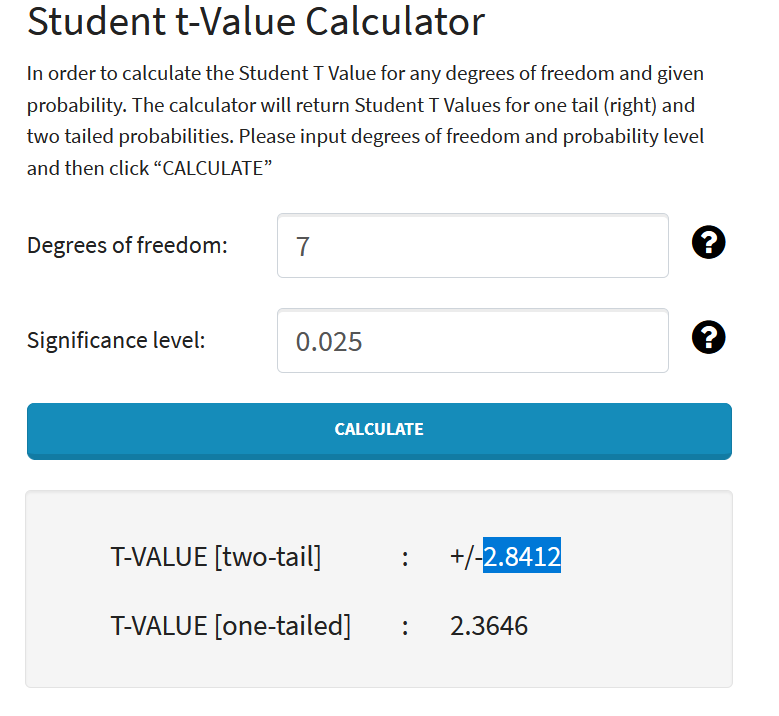

#### Paired

In [0]:
def paired_t_test(last_week_data, second_last_week_data,t_threshold):
  d = last_week_data.values - second_last_week_data.values
  d_bar = np.mean(d)
  T = (d_bar-0)/(np.std(d)/math.sqrt(len(d)))
  print("mod T: ", abs(T))
  if abs(T) > t_threshold:
      print("reject H0")
  else:
      print("accept H0")

##### Cases

In [274]:
t_alpha_by_2 = 2.8412
paired_t_test(last_week_cases['#Cases_per_day'], second_last_week_cases['#Cases_per_day'], t_alpha_by_2)

mod T:  3.6753353898034193
reject H0


Applicable/Observation:

Cases:

Death:



##### Death

In [346]:
paired_t_test(last_week_death['#Deaths_per_day'], second_last_week_death['#Deaths_per_day'], t_alpha_by_2)

mod T:  0.5415346603446712
accept H0


#### Unpaired

In [0]:
def unpaired_t_test(last_week_data, second_last_week_data):
  d = last_week_data.values - second_last_week_data.values
  d_bar = np.mean(d)
  sample_std_dev_last_week = np.std(last_week_data)
  sample_std_dev_second_last_week = np.std(second_last_week_data)
  pooled_std_dev = math.sqrt((sample_std_dev_last_week*sample_std_dev_last_week)/len(last_week_data)+
                             sample_std_dev_second_last_week*sample_std_dev_second_last_week/len(second_last_week_data))
  T = (d_bar-0)/pooled_std_dev
  print("mod T: ", abs(T))
  if abs(T) > t_alpha_by_2:
      print("reject H0")
  else:
      print("accept H0")

##### Cases

In [348]:
unpaired_t_test(last_week_cases['#Cases_per_day'], second_last_week_cases['#Cases_per_day'])

mod T:  2.0745920119311894
accept H0


Applicable or not?

##### Death

In [349]:
unpaired_t_test(last_week_death['#Deaths_per_day'], second_last_week_death['#Deaths_per_day'])

mod T:  0.6347631079116565
accept H0


#### Applicable?
Even though it satisfies the primary criteria of applicability of t-test i.e. the number of data samples are small, we don't know if the data is normally distributed or not.
Hence can't apply the test reliably.

### Two sample wald's test

#### Cases

In [350]:
Z_alphaBy2 = 1.96

X1 = last_week_cases['#Cases_per_day']
X2 = second_last_week_cases['#Cases_per_day']

p1_hat = np.mean(X1)
p2_hat = np.mean(X2)

delta_hat = p1_hat - p2_hat
se_hat_delta = np.sqrt((p1_hat * (1-p1_hat))/len(X1) + (p2_hat *(1-p2_hat))/len(X2))
w_delta = delta_hat/se_hat_delta

print("p1_mle = ", p1_hat)
print("p2_mle = ", p2_hat)
print("delta_hat = ", delta_hat)
print("se_hat_delta = ", se_hat_delta)
print("w = ", w_delta)
print("mod w = ", np.absolute(w_delta))

if np.absolute(w_delta) > Z_alphaBy2:
  print("reject H0")
else:
  print("accept H0")


p1_mle =  8064.0
p2_mle =  9599.0
delta_hat =  -1535.0
se_hat_delta =  nan
w =  nan
mod w =  nan
accept H0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


#### Death

In [351]:
Z_alphaBy2 = 1.96

X1 = last_week_death['#Deaths_per_day']
X2 = second_last_week_death['#Deaths_per_day']

p1_hat = np.mean(X1)
p2_hat = np.mean(X2)

delta_hat = p1_hat - p2_hat
se_hat_delta = np.sqrt((p1_hat * (1-p1_hat))/len(X1) + (p2_hat *(1-p2_hat))/len(X2))
w_delta = delta_hat/se_hat_delta

print("p1_mle = ", p1_hat)
print("p2_mle = ", p2_hat)
print("delta_hat = ", delta_hat)
print("se_hat_delta = ", se_hat_delta)
print("w = ", w_delta)
print("mod w = ", np.absolute(w_delta))

if np.absolute(w_delta) > Z_alphaBy2:
  print("reject H0")
else:
  print("accept H0")


p1_mle =  894.5714285714286
p2_mle =  929.5714285714286
delta_hat =  -35.0
se_hat_delta =  nan
w =  nan
mod w =  nan
accept H0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


#### Applicable
Assumption is that both the estimators for X and Y, the mu_x and mu_y should be asymptotic normal. Since the data size isn't large, we can't commit this assumption. Hence not applicable.

# Required Inference 3


Repeat inference 2 above but for equality of distributions (distribution of second-last week and last week), using K-S test and Permutation test. For the K-S test, use both 1-sample and 2-sample tests. For the 1-sample test, try Poisson, Geometric, and Binomial. To obtain parameters of these distributions to check against in 1-sample KS, use MME on second last week’s data to obtain parameters of the distribution, and then check whether the last week’s data has the distribution with the obtained MME parameters. Use a threshold of 0.05 for both K-S test and Permutation test.

## One sample KS test with Poisson distribution

In [0]:
import math
from scipy.stats import poisson

def frequency_count(data):   
  # Creating an empty dictionary  
  freq = {} 
  for item in data: 
    if (item in freq): 
      freq[item] += 1
    else: 
      freq[item] = 1
  return freq    

# week 1 data is the second last week's data used to obtain parameters of the distribution
# week 2 data is against what we will check against
def one_sample_ks_test_with_poisson_distribution(second_last_week, last_week, threshold):
  # for poisson distribution, mme estimate of lambda is sample mean
  lambda_mme = np.mean(second_last_week)
  last_week = np.sort(last_week)
  max_diff = float("-inf")
  step_size = 1/len(last_week)
  frequency_map = frequency_count(last_week)
  f_x_x_neg = 0
  for x in np.unique(last_week):
    fy_x = poisson.cdf(x, lambda_mme)
    current_element_count = frequency_map[x]
    max_diff = max(abs(f_x_x_neg - fy_x), abs(current_element_count*step_size - fy_x))
    f_x_x_neg = current_element_count*step_size

  if max_diff > threshold:
    print("Rejecting null hypothesis H_0")
  else:
    print("Accepting null hypothesis H_0")  
  return max_diff

### Cases

In [353]:
one_sample_ks_test_with_poisson_distribution(second_last_week_cases["#Cases_per_day"],
                                             last_week_cases["#Cases_per_day"],
                                             0.05)

Rejecting null hypothesis H_0


0.8571428571428572

### Death

In [354]:
one_sample_ks_test_with_poisson_distribution(second_last_week_death["#Deaths_per_day"],
                                             last_week_death["#Deaths_per_day"],
                                             0.05)

Rejecting null hypothesis H_0


0.8562734052249001

The KS test rejects the null hypotheses for both the deaths and the cases. That means the data doesn't follow the same distribution. Concluding that the Deaths and cases don't follow poisson distribution.

##One sample KS test with geometric distribution

In [0]:
def one_sample_ks_test_with_geometric_distribution(second_last_week, last_week,threshold):
  p_mme = 1/np.mean(second_last_week)
  last_week = np.sort(last_week)
  max_diff = float("-inf")
  step_size = 1/len(last_week)
  frequency_map = frequency_count(last_week)
  f_x_x_neg = 0
  for x in np.unique(last_week):
    fy_x = 1- pow(1-p_mme, x) #fy_x + (math.exp(-1 * lambda_mme)*pow(lambda_mme,i))/math.factorial(i)  
    current_element_count = frequency_map[x]
    max_diff = max(abs(f_x_x_neg - fy_x), abs(current_element_count*step_size - fy_x))
    f_x_x_neg = current_element_count*step_size
  print("max_diff is: ", max_diff)
  if max_diff > threshold:
    print("Rejecting null hypothesis H_0")
  else:
    print("Accepting null hypothesis H_0")  
  return max_diff

#### Cases

In [356]:
one_sample_ks_test_with_geometric_distribution(second_last_week_cases["#Cases_per_day"],
                                             last_week_cases["#Cases_per_day"],
                                             0.05)

max_diff is:  0.5532948858470867
Rejecting null hypothesis H_0


0.5532948858470867

Applicable or not?

#### Death

In [357]:
one_sample_ks_test_with_geometric_distribution(second_last_week_death["#Deaths_per_day"],
                                             last_week_death["#Deaths_per_day"],
                                             0.05)

max_diff is:  0.525709507066829
Rejecting null hypothesis H_0


0.525709507066829

Observation: the test rejects the assumption that the data comes from geometric distribution. 

##One sample KS test with Binomial distribution

In [0]:
from scipy.stats import binom

def one_sample_ks_test_with_binomial_distribution(second_last_week, last_week, threshold):
  p_mme = 1 - np.var(second_last_week)/np.mean(second_last_week)
  print(p_mme)
  n_mme = pow(np.mean(second_last_week),2)/(np.mean(second_last_week)-np.var(second_last_week))
  print(n_mme)

  n = len(last_week)
  last_week = np.sort(last_week)
  max_diff = float("-inf")
  step_size = 1/n
  frequency_map = frequency_count(last_week)
  f_x_x_neg = 0
  for x in np.unique(last_week):
    fy_x =  binom.cdf(x, n, p_mme)
    current_element_count = frequency_map[x]
    max_diff = max(abs(f_x_x_neg - fy_x), abs(current_element_count*step_size - fy_x))
    f_x_x_neg = current_element_count*step_size
  print("max_diff is: ", max_diff)
  if max_diff > threshold:
    print("Rejecting null hypothesis H_0")
  else:
    print("Accepting null hypothesis H_0")  
  return max_diff

#### Cases

In [359]:
one_sample_ks_test_with_binomial_distribution(second_last_week_cases["#Cases_per_day"],
                                             last_week_cases["#Cases_per_day"],
                                             0.05)

-131.35771583349455
-73.07526580446503
max_diff is:  0.8571428571428572
Rejecting null hypothesis H_0


0.8571428571428572

#### Death

In [360]:
one_sample_ks_test_with_binomial_distribution(second_last_week_death["#Deaths_per_day"],
                                             last_week_death["#Deaths_per_day"],
                                             0.05)

-8.441787964609542
-110.11546753702716
max_diff is:  0.8571428571428572
Rejecting null hypothesis H_0


0.8571428571428572

#### Observation
the test rejects the assumption that the data comes from binomial distribution. 

## Two sample KS test

In [0]:
def ks_test(X, Y, threshold):
    X = np.sort(X)
    Y = np.sort(Y)
    max_diff = float("-inf")
    max_x = 0
    y_min = 0
    y_max = 0
    for y in Y:
        count = 0;
        for x in X:
            if x < y:
                count = count + 1
        f_hat_x = count / len(X)
        f_hat_y_neg = np.searchsorted(Y, y, side='left') / len(Y)
        f_hat_y_pos = np.searchsorted(Y, y, side='right') / len(Y)
        if abs(f_hat_x - f_hat_y_neg) > max_diff or abs(f_hat_x - f_hat_y_pos) > max_diff:
            max_diff = max(max_diff, abs(f_hat_x - f_hat_y_neg), abs(f_hat_x - f_hat_y_pos))
            max_x = y
            y_min = max(y_min, f_hat_y_neg)
            y_max = max(y_max, f_hat_x)
    print("max_diff is: ", max_diff)            
    if max_diff > threshold:
      print("Rejecting null hypothesis H_0")
    else:
      print("Accepting null hypothesis H_0")

### Cases

In [362]:
ks_test(second_last_week_cases["#Cases_per_day"],last_week_cases["#Cases_per_day"],0.05)

max_diff is:  0.7142857142857143
Rejecting null hypothesis H_0


### Deaths

In [363]:
ks_test(second_last_week_death["#Deaths_per_day"],last_week_death["#Deaths_per_day"],0.05)

max_diff is:  0.2857142857142857
Rejecting null hypothesis H_0


### Observation
The test rightly rejects the assumption for both the cases and deaths. Assumption being data for second last week comes from the same distribution as last week. That's stemming from the fact that the values of data change significantly week after week.

## Permutation Test

In [0]:
def permutation_test(X, Y, p_count, p_threshold):
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    t_obs = abs(x_bar - y_bar)
    C = np.concatenate((X, Y))
    count = 0
    for i in range(p_count):
        p = np.random.permutation(C)
        mid = int(len(C) / 2)
        t_i = abs(np.mean(p[:mid]) - np.mean(p[mid:]))
        if t_i > t_obs:
            count += 1
    p_value = count / p_count
    print("p_value is: ", p_value)
    if p_value <= p_threshold:
        print("Rejecting Null Hypothesis, X and Y don't come from same distribution")
    else:
        print("Accepting Null Hypothesis, X and Y come from same distribution")

### Cases

In [365]:
permutation_test(second_last_week_cases["#Cases_per_day"],
                 last_week_cases["#Cases_per_day"],
                 len(second_last_week_cases["#Cases_per_day"])+len(last_week_cases["#Cases_per_day"]),
                 0.05)

p_value is:  0.14285714285714285
Accepting Null Hypothesis, X and Y come from same distribution


### Death

In [366]:
permutation_test(second_last_week_death["#Deaths_per_day"],
                 last_week_death["#Deaths_per_day"],
                 len(second_last_week_death["#Deaths_per_day"])+len(last_week_death["#Deaths_per_day"]),
                 0.05)

p_value is:  0.35714285714285715
Accepting Null Hypothesis, X and Y come from same distribution


### Observation

The permutation test sometimes accept the null hypothesus of same distribution



# Required Inference 4

Report the Pearson correlation value for #deaths and your X dataset, and also for #cases and your X dataset over one month of data. Use the most relevant column in X to compare against the covid numbers.


In [367]:
Xdata = throg_neck_2020
Xdata.shape

(37, 1)

Since the Xdata had 1 outlier that was removed while cleaning the data, we have 37 data points.

In [368]:
X_pear = np.array(Xdata['total vehicles'])
X_pear.shape

(37,)

In [0]:
def calculate_sampleVar(X):
  return np.sum(np.square((X - np.mean(X))))/len(X)


## For #cases

In [370]:
ny_cases_cap

,#Cases,#Cases_per_day,index
3/12/20,327,107.0,0
3/13/20,421,94.0,1
3/14/20,613,192.0,2
3/15/20,615,2.0,3
3/16/20,967,352.0,4
3/17/20,1578,611.0,5
3/18/20,3038,1460.0,6
3/19/20,5704,2666.0,7
3/20/20,8403,2699.0,8
3/21/20,11727,3324.0,9


Since 1 data point from Xdata was removed -- removing the corresponding date's datapoint from #cases_per_day

i.e., April 5th, 2020 which is at index 24

In [371]:
Y_pear = np.array(ny_cases_cap['#Cases_per_day'])
Y_pear = np.delete(Y_pear, [24], axis=0)
Y_pear


array([1.0700e+02, 9.4000e+01, 1.9200e+02, 2.0000e+00, 3.5200e+02,
       6.1100e+02, 1.4600e+03, 2.6660e+03, 2.6990e+03, 3.3240e+03,
       4.0730e+03, 5.0840e+03, 4.7970e+03, 5.1600e+03, 7.0360e+03,
       6.9990e+03, 7.5340e+03, 7.2380e+03, 7.0150e+03, 9.1700e+03,
       8.1150e+03, 8.5580e+03, 1.0481e+04, 1.0846e+04, 8.6550e+03,
       8.0600e+03, 1.1186e+04, 1.0718e+04, 1.0569e+04, 8.6780e+03,
       8.0070e+03, 6.7160e+03, 7.2710e+03, 1.1434e+04, 9.2370e+03,
       6.9060e+03, 6.8770e+03])

In [372]:
print("shape of Y = ", Y_pear.shape)
print("shape of X = ", X_pear.shape)

shape of Y =  (37,)
shape of X =  (37,)


In [373]:
X = X_pear
Y = Y_pear

# calculating the pearson correlation coefficient
numer = np.sum((X - np.mean(X))*(Y - np.mean(Y)))
denom = np.sqrt(calculate_sampleVar(X) * calculate_sampleVar(Y) * len(X) * len(Y))
denom_2 = np.sqrt(np.sum(np.square(X - np.mean(X))) * np.sum(np.square(Y - np.mean(Y))))
rho_hat = numer/denom

print("rho hat value = ", rho_hat)

if rho_hat > 0.5:
  print("positive linear dependence/correlation")
elif rho_hat < -0.5:
  print("negative linear dependence/correlation")
else:
  print("No correlation")

rho hat value =  -0.8082305529213043
negative linear dependence/correlation


We can see from this result that our X data and #cases have a **very high** negative linear correlation.

## For #deaths

In [374]:
ny_deaths_cap

,#Deaths,#Deaths_per_day,index
3/12/20,1,1.0,0
3/13/20,2,1.0,1
3/14/20,6,4.0,2
3/15/20,12,6.0,3
3/16/20,24,12.0,4
3/17/20,38,14.0,5
3/18/20,63,25.0,6
3/19/20,96,33.0,7
3/20/20,151,55.0,8
3/21/20,195,44.0,9


Since 1 data point from Xdata was removed -- removing the corresponding date's datapoint from #cases_per_day

i.e., April 5th, 2020 which is at index 24

In [375]:
Y_pear = np.array(ny_deaths_cap['#Deaths_per_day'])
Y_pear = np.delete(Y_pear, [24], axis=0)
Y_pear


array([1.000e+00, 1.000e+00, 4.000e+00, 6.000e+00, 1.200e+01, 1.400e+01,
       2.500e+01, 3.300e+01, 5.500e+01, 4.400e+01, 9.100e+01, 1.010e+02,
       1.250e+02, 1.470e+02, 2.430e+02, 3.090e+02, 3.770e+02, 4.280e+02,
       5.400e+02, 6.510e+02, 7.100e+02, 8.130e+02, 6.880e+02, 5.730e+02,
       1.024e+03, 1.077e+03, 9.480e+02, 9.440e+02, 8.270e+02, 8.930e+02,
       9.440e+02, 9.480e+02, 8.710e+02, 7.520e+02, 7.160e+02, 1.026e+03,
       1.005e+03])

In [376]:
print("shape of Y = ", Y_pear.shape)
print("shape of X = ", X_pear.shape)

shape of Y =  (37,)
shape of X =  (37,)


In [377]:
X = X_pear
Y = Y_pear

# calculating the pearson correlation coefficient
numer = np.sum((X - np.mean(X))*(Y - np.mean(Y)))
denom = np.sqrt(calculate_sampleVar(X) * calculate_sampleVar(Y) * len(X) * len(Y))
denom_2 = np.sqrt(np.sum(np.square(X - np.mean(X))) * np.sum(np.square(Y - np.mean(Y))))
rho_hat = numer/denom
print("rho value = ", rho_hat)

if rho_hat > 0.5:
  print("positive linear dependence/correlation")
elif rho_hat < -0.5:
  print("negative linear dependence/correlation")
else:
  print("No correlation")

rho value =  -0.66720644607601
negative linear dependence/correlation


We can see from this result that our X data and #cases have a **high** negative linear correlation.

# Required Inference 5

**Observation**: We could see from execution that as we saw more data the probability density decreased and MAP for lambda increased.

Assume the daily deaths are Poisson distributed with parameter lambda. Assume an Exponential prior (with mean beta) on lambda. To find beta for the prior, equate the mean of the Exponential prior to that of the Poisson lambda_MME. That is, find the MME of lambda using the first week’s data, and equate this lambda to the mean of Exp(1/beta) to find beta for the prior. Use first week’s data to obtain the posterior for lambda via Bayesian inference. Now, use second week’s data to obtain the new posterior, using prior as posterior after week 1. Repeat till the end of week 4. Plot all posterior distributions on one graph. Report the MAP for all posteriors.


In [378]:
D = np.array(ny_deaths_cap['#Deaths_per_day'])
D.shape

(38,)

In [379]:
D1 = D[:7]
D2 = D[7:14]
D3 = D[14:21]
D4 = D[21:28]
print("First week's data = ", D1)
print("2nd week's data = ", D2)
print("3rd week's data = ", D3)
print("4th week's data = ", D4)

First week's data =  [ 1.  1.  4.  6. 12. 14. 25.]
2nd week's data =  [ 33.  55.  44.  91. 101. 125. 147.]
3rd week's data =  [243. 309. 377. 428. 540. 651. 710.]
4th week's data =  [ 813.  688.  573.  794. 1024. 1077.  948.]


In [380]:
# mean of exp(1/beta) = beta = lambda_mme = D1_bar

beta = np.mean(D1)
print("beta = ", beta)

beta =  9.0


Posterior of lambda via bayesian inference (after seeing D1) takes the form of a gamma distribution gamma(a,b), such that, 

a = 1 + sum(D1)

b = len(D1) + 1/beta 

On taking the derivative of the posterior distribution and equating to 0, we find:

lambda_MAP = sum(D1)/(len(D1) + 1/beta)


---


Now, when we use second week’s data to obtain the new posterior, using prior as posterior after week 1, we find it takes the form of gamma(a,b), such that, 

a = 1 + sum(D1 and D2)

b = len(D1 and D2) + 1/beta

Also,

lambda_MAP = sum(D1 and D2)/(len(D1 and D2) + 1/beta)


---

And, so on, we see gamma(a,b) is the conjugate prior of Poisson distribution, thus, 

f(lambda | D1 and D2 and D3) ~ gamma(a,b) , where

a = 1 + sum(D1 and D2 and D3)

b = len(D1 and D2 and D3) + 1/beta

Also,

lambda_MAP = sum(D1 and D2 and D3)/(len(D1 and D2 and D3) + 1/beta)


---


f(lambda | D1 and D2 and D3 and D4) ~ gamma(a,b) , where

a = 1 + sum(D1 and D2 and D3 and D4)

b = len(D1 and D2 and D3 and D4) + 1/beta

Also,

lambda_MAP = sum(D1 and D2 and D3 and D4)/(len(D1 and D2 and D3 and D4) + 1/beta)

---












In [0]:
def calculate_a(data):
  return 1 + np.sum(data)

def calculate_b(data):
  return len(data) + (1/beta)

def calculate_lambdaMAP(data):
  return np.sum(data)/(len(data) + (1/beta))

lambda_MAP = []
a = []
b = []

## Calculate a, b, and lambda_MAP after week1, week2, week3 and week4 for #Deaths

In [0]:
# Week1
a.append(calculate_a(D1))
b.append(calculate_b(D1))
lambda_MAP.append(calculate_lambdaMAP(D1))

# Week2
w2 = np.concatenate((D1,D2))
a.append(calculate_a(w2))
b.append(calculate_b(w2))
lambda_MAP.append(calculate_lambdaMAP(w2))

# Week3
w3 = np.concatenate((w2,D3))
a.append(calculate_a(w3))
b.append(calculate_b(w3))
lambda_MAP.append(calculate_lambdaMAP(w3))

# Week4
w4 = np.concatenate((w3,D4))
a.append(calculate_a(w4))
b.append(calculate_b(w4))
lambda_MAP.append(calculate_lambdaMAP(w4))

## Plot Posterior Distributions and Report lambda_MAP

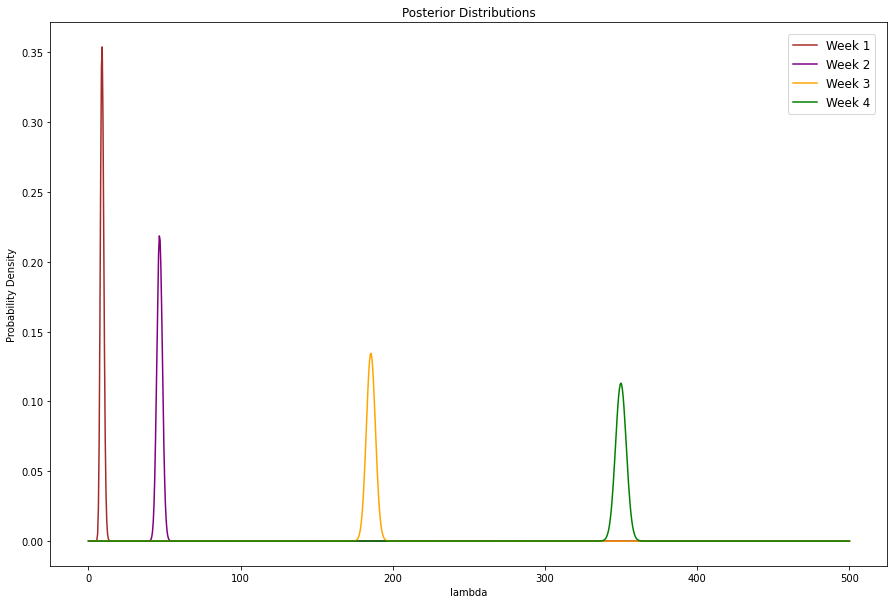

In [383]:
def plot_posterior(a, b):
    x = np.linspace(0, 500, 1000)
    y1 = gamma.pdf(x, a[0], scale=1/b[0])
    y2 = gamma.pdf(x, a[1], scale=1/b[1])
    y3 = gamma.pdf(x, a[2], scale=1/b[2])
    y4 = gamma.pdf(x, a[3], scale=1/b[3])
    plt.subplots(figsize=(15,10))
    plt.title("Posterior Distributions")
    plt.xlabel("lambda")
    plt.ylabel("Probability Density")
    plt.plot(x, y1, label="Week 1", color='brown')
    plt.plot(x, y2, label="Week 2", color='purple')
    plt.plot(x, y3, label="Week 3", color='orange')
    plt.plot(x, y4, label="Week 4", color='green')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
               borderaxespad=1, fontsize=12)
    
plot_posterior(a, b)

In [384]:
map_df = pd.DataFrame(lambda_MAP, columns=["lambda_MAP"])
map_df.index = ["Week 1", "Week 2", "Week 3", "Week 4"]
map_df

,lambda_MAP
Week 1,8.859375
Week 2,46.700787
Week 3,185.542105
Week 4,349.826087


## Additional inference with Week 5 
Since we had 38 data points we tried plotting for week 5 too.

(post which 3 data points were remaining - ignored the same for this inference)

,lambda_MAP
Week 1,8.859375
Week 2,46.700787
Week 3,185.542105
Week 4,349.826087
Week 5,441.762215


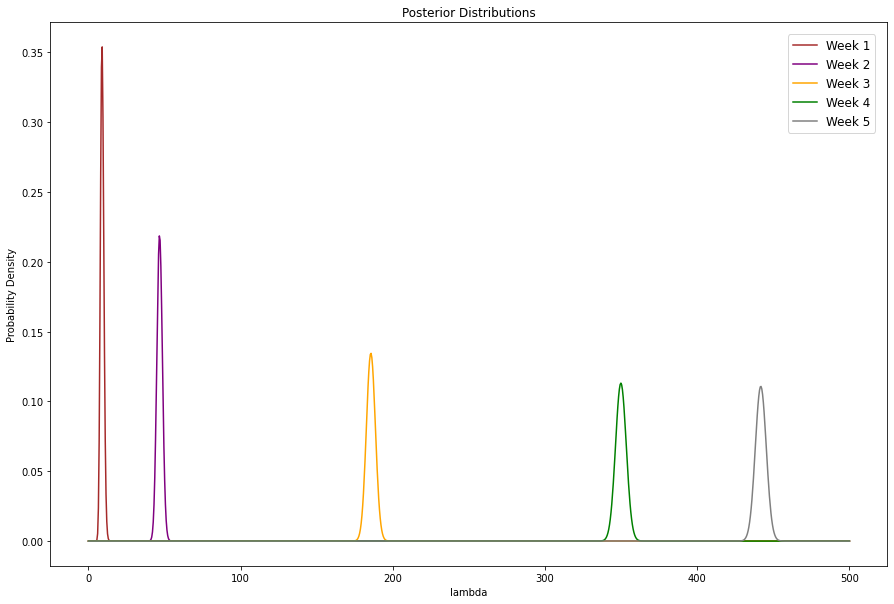

In [385]:
D5 = D[29:35]


# Week5
w5 = np.concatenate((w4,D5))
a.append(calculate_a(w5))
b.append(calculate_b(w5))
lambda_MAP.append(calculate_lambdaMAP(w5))

def plot_posterior(a, b):
    x = np.linspace(0, 500, 1000)
    y1 = gamma.pdf(x, a[0], scale=1/b[0])
    y2 = gamma.pdf(x, a[1], scale=1/b[1])
    y3 = gamma.pdf(x, a[2], scale=1/b[2])
    y4 = gamma.pdf(x, a[3], scale=1/b[3])
    y5 = gamma.pdf(x, a[4], scale=1/b[4])
    plt.subplots(figsize=(15,10))
    plt.title("Posterior Distributions")
    plt.xlabel("lambda")
    plt.ylabel("Probability Density")
    plt.plot(x, y1, label="Week 1", color='brown')
    plt.plot(x, y2, label="Week 2", color='purple')
    plt.plot(x, y3, label="Week 3", color='orange')
    plt.plot(x, y4, label="Week 4", color='green')
    plt.plot(x, y5, label="Week 5", color='gray')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
               borderaxespad=1, fontsize=12)
    
plot_posterior(a, b)

map_df = pd.DataFrame(lambda_MAP, columns=["lambda_MAP"])
map_df.index = ["Week 1", "Week 2", "Week 3", "Week 4", "Week 5"]
map_df

# Additional Inferences

## Inference 1

Use your X dataset to check if COVID19 had an impact on the X data. State your hypothesis clearly and determine the best tool (from among those learned in class) to apply to your hypotheses. Also check whether the tool/test is applicable or not. 


**EXPLANATION:**

Type 1. We want to test if #Vehicles_per_day commuting on Throgs Neck Bridge decreased due to COVID19 as compared to last year during the same timeframe.

X = #vehicles_per_day during [03-12-2020, 04-18-2020]
Y = #vehicles_per_day during [03-12-2019, 04-18-2019]


Hypothesis:

H0: mean_X >= mean_Y 

v/s

H1: mean_X < mean_Y


We use **one-sided unpaired and paired T-tests** to test the hypothesis. 

Also, we wanted to check the extent of decrease observed so we calculate the p-value. 


Type 2. **Further**, we wanted to check when did the traffic **started** to decrease, so we do a week by week comparison from Y, i.e., 2020 data. 

We go ahead and define this test as:

X1 = second week of Y , i.e., dayds 8-14
Y1 = first week of Y, i.e., 1st 7 days

H0: mean_X >= mean_Y 

v/s

H1: mean_X < mean_Y

Again, using the same tests and extent calculation by computing p-value.

We mean to do this for every consecutinve pairs of weeks till we find the week with the drop, or in other words, we are able to accept H0. 



Applicability :  Don't know data normal so don;t know applicable or not 

But, we used T-test because n is small 

In [0]:
# H0: mu_x >= mu_y and H1: mu_x < mu_y

def calculate_sampleVar(X):
  return np.sum(np.square((X - np.mean(X))))/len(X)

def one_sided_unpaired_t_test(X, Y, t_thresh):
  D_bar = np.mean(X) - np.mean(Y) # calculate d bar
  s_x2 = calculate_sampleVar(X) # sample variance of x
  s_y2 = calculate_sampleVar(Y) # sample variance of y
  pooled_sd = np.sqrt((s_x2/len(X)) + (s_y2/len(Y))) # pooled standard deviation
  u_t = D_bar/pooled_sd

  print("D_bar = ", D_bar)
  print("D_bar from Xbar - Ybar = ", np.mean(X) - np.mean(Y))
  print("pooled std dev= ", pooled_sd)
  print("t = ", u_t)

  if u_t < t_thresh:
    print("reject H0")
  else:
    print("accept H0")
  

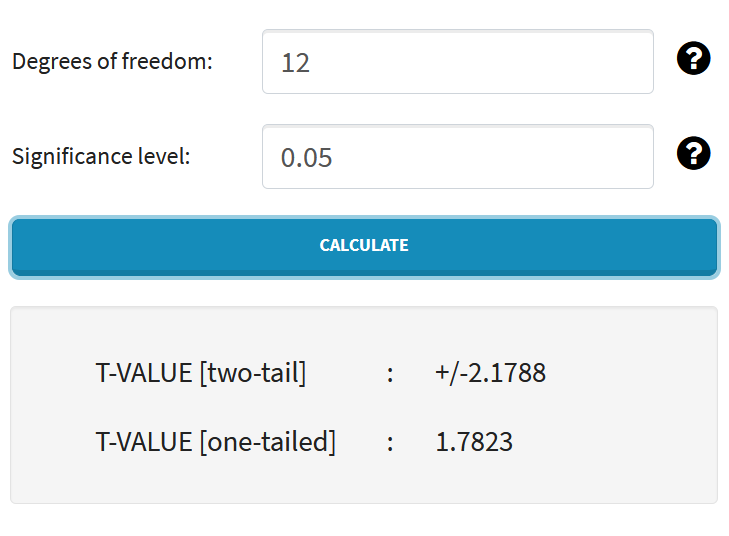

### Type 1

In [387]:

# X->  Xdat for [03-12-2020, 04-18-2020]
# Y->  Xdata [03-12-2019, 04-18-2019]


n = len(throg_neck_2019)
m = len(throg_neck_2020)
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.7823 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(throg_neck_2020.values,
                            throg_neck_2019.values,t_threshold)

Degree of freedoms:  72
T-threshold:  -1.7823
D_bar =  -63158.75675675675
D_bar from Xbar - Ybar =  -63158.75675675675
pooled std dev=  3415.9667858844314
t =  -18.489277184351856
reject H0


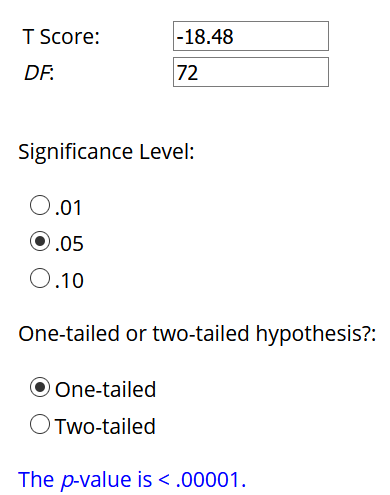

### Type 2

In [388]:
# X -> second week of 2020
# Y -> first week of 2020
# apply one tailed, and if rejected x -> third week y-> first
# stop when accept
# find p-value
# apply paired t-test for same dataset and find p-value

n = len(throg_neck_2020_weekly[0])
m = len(throg_neck_2020_weekly[1])
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6663 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(throg_neck_2020_weekly[1].values,
                              throg_neck_2020_weekly[0].values,t_threshold)

print()

n = len(throg_neck_2020_weekly[1])
m = len(throg_neck_2020_weekly[2])
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6663 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(throg_neck_2020_weekly[2].values,
                              throg_neck_2020_weekly[1].values,t_threshold)
print()

n = len(throg_neck_2020_weekly[2])
m = len(throg_neck_2020_weekly[3])
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6663 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(throg_neck_2020_weekly[3].values,
                              throg_neck_2020_weekly[2].values,t_threshold)

Degree of freedoms:  12
T-threshold:  -1.6663
D_bar =  -32713.71428571429
D_bar from Xbar - Ybar =  -32713.71428571429
pooled std dev=  6483.27370919493
t =  -5.045863517888798
reject H0

Degree of freedoms:  12
T-threshold:  -1.6663
D_bar =  -13538.0
D_bar from Xbar - Ybar =  -13538.0
pooled std dev=  6212.400952275757
t =  -2.1791896730427056
reject H0

Degree of freedoms:  12
T-threshold:  -1.6663
D_bar =  655.4285714285725
D_bar from Xbar - Ybar =  655.4285714285725
pooled std dev=  4144.975044149009
t =  0.1581260597343684
accept H0


So for 3rd-4th week did our data get different

## Inference 2

Check if COVID19 data changed after some local event or rule was enforced, like lockdown or stay-at-home, etc. For this, compare COVID19 data before and after the event. Maybe take into account that COVID19 takes some time to show symptoms, so maybe give some time to allow the lockdown to show its effects.

**EXPLANATION:**

We want to test if #cases_per_day and #deaths_per_day decreased after the lockdown rule was passed in NY state on March 22, 2020. 

Here, we take 2 cases and hypothesize:

Type 1. Treating March 22, 2020 as the change point 
Type 2. Treating April 5, 2020 as the change point. That is, 14 days after the actual order: reason being 14 days of incubation period. But, in this case we consider the data for 10 days before March 22 (pre-lockdown) and 10 days after April 5 because we wanted to capture the effects before and after incubation period.
Type 3: Treating April 5, 2020 as the change point. That is, 14 days after the actual order: reason being 14 days of incubation period. But, in this case we consider the data for 14 days before 14 days after April 5 because we wanted to capture the effects before and after incubation period.

Now, we hypothesize Type 2 in 2 ways: 

Type 2.1: 

X = #cases_per_day before and including 03-22-2020
Y = #cases_per_day after 03-22-2020

H0: mean_X >= mean_Y 

v/s

H1: mean_X < mean_Y

We apply **one sided unpaired T-test** here. 

Type 2.2: 

X = #cases_per_day 14 days before 04-05-2020
Y = #cases_per_day on 04-05-2020 and 13 days after (total 14 days)

We apply **one sided paired AND unpaired T-tests** here.

Hypothesis:

H0: mean_X >= mean_Y 

v/s

H1: mean_X < mean_Y


We use **one-sided unpaired and paired T-tests** to test the hypothesis. 


Further, we go ahead and check the extent of effect so we compute the p-value. 


Applicability :  Don't know data normal so don;t know applicable or not 

But, we used T-test because n is small 


### Cases

#### Type 1

In [389]:
# unpaired = March 12-21, Apr 5-14
n = len(ny_cases_cap['#Cases'][0:10])
m = len(ny_cases_cap['#Cases'][10:])
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6883 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(ny_cases_cap['#Cases'][10:].values,
                              ny_cases_cap['#Cases'][0:10].values,t_threshold)

Degree of freedoms:  36
T-threshold:  -1.6883
D_bar =  117334.59285714285
D_bar from Xbar - Ybar =  117334.59285714285
pooled std dev=  13326.353883102527
t =  8.804703363454882
accept H0


https://www.socscistatistics.com/pvalues/tdistribution.aspx for given t, significance level and degree of freedom
The p-value is < .00001.

#### Type 2.1

In [390]:
ny_cases_cap['#Cases'][24:34]

4/5/20     123160
4/6/20     131815
4/7/20     139875
4/8/20     151061
4/9/20     161779
4/10/20    172348
4/11/20    181026
4/12/20    189033
4/13/20    195749
4/14/20    203020
Name: #Cases, dtype: int64

In [391]:
# paired
# X - > March 12-21(10 days),
# Y - > Apr 5-14(10 days)
n = len(ny_cases_cap['#Cases'][0:10])
m = len(ny_cases_cap['#Cases'][24:34])
print("Degree of freedoms: ", n+m-2)
t_threshold =  2.1009 
print("T-threshold: ", t_threshold)
paired_t_test(ny_cases_cap['#Cases'][0:10],
                              ny_cases_cap['#Cases'][24:34],t_threshold)

Degree of freedoms:  18
T-threshold:  2.1009
mod T:  21.96629897501323
reject H0


Hence lockdown help change

The p-value is < .00001.

#### Type 2.2

In [392]:
# X -> March 12-21, 
# Y -> March 22-Apr 18 [unpaired] -> not considering impact of incubation time
# whole data immediately after lockdown
n = len(ny_cases_cap['#Cases'][0:10])
m = len(ny_cases_cap['#Cases'][24:34])
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6883 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(ny_cases_cap['#Cases'][24:34],
                              ny_cases_cap['#Cases'][:10],t_threshold)

Degree of freedoms:  18
T-threshold:  -1.6883
D_bar =  161547.30000000002
D_bar from Xbar - Ybar =  161547.30000000002
pooled std dev=  8432.035208951631
t =  19.158755389030862
accept H0


The p-value is < .00001.

#### Type 3


In [0]:
# X -> Apr 5 -14 Y -> Apr5 +14 [paired, unpaired] -> 
# considering the change point to be start of lockdown order + incubation period 

In [394]:
# paired
# why april 5? since lockdown was imposed on Mar 22 in new york
# so considering 14 days incubation period, we arrive at April 5

n = len(ny_cases_cap['#Cases'][10:24])
m = len(ny_cases_cap['#Cases'][24:])
print("Degree of freedoms: ", n+m-2)
t_threshold =  2.0555 
print("T-threshold: ", t_threshold)
paired_t_test(ny_cases_cap['#Cases'][10:24],
                              ny_cases_cap['#Cases'][24:],t_threshold)

Degree of freedoms:  26
T-threshold:  2.0555
mod T:  62.71569615819643
reject H0


The p-value is < .00001.

In [395]:
# unpaired
n = len(ny_cases_cap['#Cases'][0:24])
m = len(ny_cases_cap['#Cases'][24:])
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6883 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(ny_cases_cap['#Cases'][24:],
                              ny_cases_cap['#Cases'][0:24],t_threshold)

Degree of freedoms:  36
T-threshold:  -1.6883
D_bar =  146790.0238095238
D_bar from Xbar - Ybar =  146790.0238095238
pooled std dev=  12098.47561971039
t =  12.132935455965947
accept H0


The p-value is < .00001.

### Death

#### Death(to measure 14 days impact)

In [396]:
#Unpaired
# Y -> pre lock down data
# X -> Post lock down data
Y = ny_deaths_cap['#Deaths'][0:10]
X = ny_deaths_cap['#Deaths'][10:]
n = len(X)
m = len(Y)
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6883 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(X.values,
                              Y.values,t_threshold)

Degree of freedoms:  36
T-threshold:  -1.6883
D_bar =  7581.378571428571
D_bar from Xbar - Ybar =  7581.378571428571
pooled std dev=  1134.6318709005104
t =  6.681795889808335
accept H0


The p-value is < .00001.


In [397]:
# paired = March 12-21(10 days), Apr 5-14(10 days)
# Y -> pre lock down
# X -> Post lock down
Y = ny_deaths_cap['#Deaths'][0:10]
X = ny_deaths_cap['#Deaths'][24:34]

n = len(X)
m = len(Y)
print("Degree of freedoms: ", n+m-2)
t_threshold =  2.1009 
print("T-threshold: ", t_threshold)
paired_t_test(X,Y,t_threshold)

Degree of freedoms:  18
T-threshold:  2.1009
mod T:  13.348843769238915
reject H0


The p-value is < .00001.

#### Death(not considering impact of incubation time)

In [398]:
# X -> post lockdown
# Y -> pre lockdown
X = ny_deaths_cap['#Deaths'][10:]
Y = ny_deaths_cap['#Deaths'][:10]
n = len(Y)
m = len(X)
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6883 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(X,Y,t_threshold)

Degree of freedoms:  36
T-threshold:  -1.6883
D_bar =  7581.378571428571
D_bar from Xbar - Ybar =  7581.378571428571
pooled std dev=  1134.6318709005104
t =  6.681795889808335
accept H0


The p-value is < .00001.

#### Deaths(considering the change point to be start of lockdown order + incubation period)

In [399]:
# paired
# X -> time between lockdown and incubation period
# Y -> post lockdown
X = ny_deaths_cap['#Deaths'][10:24]
Y = ny_deaths_cap['#Deaths'][24:]
n = len(X)
m = len(Y)
print("Degree of freedoms: ", n+m-2)
t_threshold =  2.0555 
print("T-threshold: ", t_threshold)
paired_t_test(ny_deaths_cap['#Deaths'][10:24],
                              ny_deaths_cap['#Deaths'][24:],t_threshold)

Degree of freedoms:  26
T-threshold:  2.0555
mod T:  20.669435578811886
reject H0


The p-value is < .00001.

In [400]:
# unpaired
# X is post lockdown
# Y is pre lockdown
X = ny_deaths_cap['#Deaths'][24:]
Y = ny_deaths_cap['#Deaths'][0:24]
n = len(X)
m = len(Y)
print("Degree of freedoms: ", n+m-2)
t_threshold = -1.6883 # negative since it's one sided and decided per our hypothesis
print("T-threshold: ", t_threshold)
one_sided_unpaired_t_test(X,Y,t_threshold)

Degree of freedoms:  36
T-threshold:  -1.6883
D_bar =  11480.738095238095
D_bar from Xbar - Ybar =  11480.738095238095
pooled std dev=  1043.1366785513578
t =  11.005976811381819
accept H0


The p-value is < .00001.

## Inference 3

Use linear regression to find the impact of age, gender, underlying conditions, etc., on the severity of covid19 symptoms or duration

**EXPLANATION:**

We want to check the impact of gender and age on #cases and #deaths. 

To do that we needed data which was not readily available online. 
We had to manually collate the data of gender, age, hospitalizations and total cases in a csv. 



We used the following sources to do that:

https://www1.nyc.gov/site/doh/covid/covid-19-data-archive.page

https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary-hospitalizations-04252020-1.pdf

Please note that this is not the same #cases and #deaths data as we used before for all other inferences. Discussed with Anshul about this.

This data is from March 24, 2020 to April 24, 2020 which still satisfies the requirement of minimum 30 days.


Now, we define our tests:

1. We apply simple linear regression for:
  1. Y = #hospitalized_cases , X = #males
  2. Y = #hospitalized_cases , X = #females
  3. Y = #hospitalized_cases , X = #cases_falling_in_age_group_0-17
  4. Y = #hospitalized_cases , X = #cases_falling_in_age_group_75_above

  We did not want to do multiple linear regression with gender because it would have turned out to be trivial with the relation of Y = X1 + X2. 

  With the beta coefficients that we find using linear regression, we can estimate the impact of these features independently. 

2. Further, we also apply Chi square test:
  1. H0: Y is independent of X

   v/s

  H1: Y is not independent of X

We do this for:

X = gender , Y = hospitalization

and 

X = age_group (less than 65 or above 65yrs)
Y = hospitalization

We use the cumulative data of #females_hospitalized, #females_not_hospitalized, #males_hospitalized, #males_not_hospitalized,  #less_than_65_hospitalized,  #more_than_65_hospitalized,  
from April 24, 2020 to apply chi square test.




Apllicabloty : don't know if ideal linear relationship exists so LR not applicable

Chi square : no assumptions so applicable



Observation from below: We can observe the value of b1_hat for males lr model is 1.72 while for female is 2.35. By comparing these coefficients we can conclude that covid impacted males more. [since y is total hospitalization a lower beta implies more impact and ]



#### gender impact

In [0]:
demographics_data = pd.read_csv("CSE544_Project/demographics.csv")

In [402]:
demographics_data.shape

(32, 19)

In [403]:
demographics_data.head()

,Date,Male,Female,Unknown,Male all cases,Female all cases,Unknown all cases,H-0 to 17,T-0 to 17,H-18 to 44,T-18 to 44,H-45 to 64,T-45 to 64,H-65 to 74,T-65 to 74,H-75 and over,T-75 and over,H-unknown,T-unknown
0,"March 24,2020",1691,1191,1,8838,6736,23,28,384,629,7094,1061,5194,550,1689,615,1227,0,9
1,"March 25,2020",2293,1628,1,11325,8655,31,35,446,837,8880,1470,6786,736,2226,844,1633,0,40
2,"March 26,2020",2801,1918,1,12948,10124,40,46,495,950,10145,1749,7869,946,2627,1029,1935,0,41
3,"March 27,2020",3003,2035,1,14863,11792,42,47,543,971,11617,1886,9158,1032,3034,1103,2286,0,59
4,"March 28,2020",3741,2545,1,17133,13592,40,58,591,1224,13213,2350,10596,1267,3571,1388,2724,0,70


Male, Female and Unknown column denote the hospitalization 

In [0]:
gender_hospitalization = demographics_data[['Male','Female']]

In [405]:
gender_hospitalization['total'] = gender_hospitalization['Male'] + gender_hospitalization['Female']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [406]:
gender_hospitalization

,Male,Female,total
0,1691,1191,2882
1,2293,1628,3921
2,2801,1918,4719
3,3003,2035,5038
4,3741,2545,6286
5,4408,3001,7409
6,4610,3130,7740
7,5093,3455,8548
8,5792,3980,9772
9,6295,4292,10587


In [407]:
gender_hospitalization['male_per_day'] = demographics_data['Male'].diff().fillna(demographics_data['Male'])
gender_hospitalization['female_per_day'] = demographics_data['Female'].diff().fillna(demographics_data['Female'])
gender_hospitalization['total_per_day'] = gender_hospitalization['total'].diff().fillna(gender_hospitalization['total'])
gender_hospitalization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Male,Female,total,male_per_day,female_per_day,total_per_day
0,1691,1191,2882,1691.0,1191.0,2882.0
1,2293,1628,3921,602.0,437.0,1039.0
2,2801,1918,4719,508.0,290.0,798.0
3,3003,2035,5038,202.0,117.0,319.0
4,3741,2545,6286,738.0,510.0,1248.0
5,4408,3001,7409,667.0,456.0,1123.0
6,4610,3130,7740,202.0,129.0,331.0
7,5093,3455,8548,483.0,325.0,808.0
8,5792,3980,9772,699.0,525.0,1224.0
9,6295,4292,10587,503.0,312.0,815.0


In [0]:
def calculate_b1hat(X,Y):
    b1_hat = (np.sum(X*Y) - (np.mean(X)*np.mean(Y)*len(X)))/(np.sum(X*X) - (len(X)*np.mean(X)*np.mean(X)))
    return b1_hat

def calculate_b0hat(X,Y,b1_hat):
    b0_hat = np.mean(Y) - (b1_hat*np.mean(X))
    return b0_hat
  
def calculate_Yhat(b0_hat, b1_hat, X):
  Y_hat = b0_hat + (b1_hat*X)
  return Y_hat

def calculate_sse(Y, Y_hat):
  return np.sum(np.square(Y-Y_hat))

def calculate_mse(sse, Y):
  return sse/len(Y)

def calculate_e_hat(Y, Y_hat):
  return Y-Y_hat

def calculate_MAPE(e_hat, Y):
  return np.sum(((np.absolute(e_hat))/Y)*100)/len(Y)


In [409]:
X = gender_hospitalization['male_per_day']
Y = gender_hospitalization['total_per_day']

b1_hat = calculate_b1hat(X, Y)
print("b1_hat = ", b1_hat)

b0_hat = calculate_b0hat(X, Y, b1_hat)
print("b0_hat = ", b0_hat)

Y_hat = calculate_Yhat(b0_hat, b1_hat, X)
# print("Y_hat = ", Y_hat)

e_hat = calculate_e_hat(Y, Y_hat)
# print("e_hat = ", e_hat)

sse = calculate_sse(Y, Y_hat)
print("SSE =", sse)

mse = calculate_mse(sse, Y)
print("Mean Squared Error =", mse)

mape = calculate_MAPE(e_hat, Y)
print("MAPE = ", mape)

b1_hat =  1.726443366380674
b0_hat =  -12.636012024423735
SSE = 77208.46146148548
Mean Squared Error = 2412.7644206714212
MAPE =  4.396630690055824


In [410]:
X = gender_hospitalization['female_per_day']
Y = gender_hospitalization['total_per_day']

b1_hat = calculate_b1hat(X, Y)
print("b1_hat = ", b1_hat)

b0_hat = calculate_b0hat(X, Y, b1_hat)
print("b0_hat = ", b0_hat)

Y_hat = calculate_Yhat(b0_hat, b1_hat, X)
# print("Y_hat = ", Y_hat)

e_hat = calculate_e_hat(Y, Y_hat)
# print("e_hat = ", e_hat)

sse = calculate_sse(Y, Y_hat)
print("SSE =", sse)

mse = calculate_mse(sse, Y)
print("Mean Squared Error =", mse)

mape = calculate_MAPE(e_hat, Y)
print("MAPE = ", mape)

b1_hat =  2.3556185370883114
b0_hat =  28.1364581872524
SSE = 144078.9831955201
Mean Squared Error = 4502.468224860003
MAPE =  6.590347873073126


Compare the value of B hat for finding the gender impact

#### age group impact

finding the impact of age group on hospitalization

In [411]:
age_group_hospitalization = demographics_data[['H-0 to 17','H-75 and over']]
age_group_hospitalization['H-0 to 17 per day'] = age_group_hospitalization['H-0 to 17'].diff().fillna(age_group_hospitalization['H-0 to 17'])
age_group_hospitalization['H-75 and over per day'] = age_group_hospitalization['H-75 and over'].diff().fillna(age_group_hospitalization['H-75 and over'])
age_group_hospitalization['total'] = gender_hospitalization['total_per_day']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [412]:
age_group_hospitalization

,H-0 to 17,H-75 and over,H-0 to 17 per day,H-75 and over per day,total
0,28,615,28.0,615.0,2882.0
1,35,844,7.0,229.0,1039.0
2,46,1029,11.0,185.0,798.0
3,47,1103,1.0,74.0,319.0
4,58,1388,11.0,285.0,1248.0
5,67,1620,9.0,232.0,1123.0
6,72,1722,5.0,102.0,331.0
7,74,1922,2.0,200.0,808.0
8,83,2209,9.0,287.0,1224.0
9,88,2423,5.0,214.0,815.0


In [413]:
X = age_group_hospitalization['H-0 to 17 per day']
Y = age_group_hospitalization['total']

b1_hat = calculate_b1hat(X, Y)
print("b1_hat = ", b1_hat)

b0_hat = calculate_b0hat(X, Y, b1_hat)
print("b0_hat = ", b0_hat)

Y_hat = calculate_Yhat(b0_hat, b1_hat, X)
# print("Y_hat = ", Y_hat)

e_hat = calculate_e_hat(Y, Y_hat)
# print("e_hat = ", e_hat)

sse = calculate_sse(Y, Y_hat)
print("SSE =", sse)

mse = calculate_mse(sse, Y)
print("Mean Squared Error =", mse)

mape = calculate_MAPE(e_hat, Y)
print("MAPE = ", mape)

b1_hat =  88.50209965688533
b0_hat =  511.2953090592513
SSE = 9174620.364239259
Mean Squared Error = 286706.88638247683
MAPE =  69.42334468298904


In [414]:
X = age_group_hospitalization['H-75 and over per day']
Y = age_group_hospitalization['total']

b1_hat = calculate_b1hat(X, Y)
print("b1_hat = ", b1_hat)

b0_hat = calculate_b0hat(X, Y, b1_hat)
print("b0_hat = ", b0_hat)

Y_hat = calculate_Yhat(b0_hat, b1_hat, X)
# print("Y_hat = ", Y_hat)

e_hat = calculate_e_hat(Y, Y_hat)
# print("e_hat = ", e_hat)

sse = calculate_sse(Y, Y_hat)
print("SSE =", sse)

mse = calculate_mse(sse, Y)
print("Mean Squared Error =", mse)

mape = calculate_MAPE(e_hat, Y)
print("MAPE = ", mape)

b1_hat =  3.4016034963292934
b0_hat =  85.20756725735623
SSE = 5308154.092463317
Mean Squared Error = 165879.81538947867
MAPE =  29.913287726910763


### Chi-square test

#### Gender vs hospitalization

In [415]:
# These values are picked from last value of hospitalization excel file.
# Need to attach that file

f_hospitalized = 16407
f_not_hospitalized = 72050 - f_hospitalized
m_hospitalized = 23142
m_not_hospitalized = 78193 - m_hospitalized

total_hospitalized = f_hospitalized + m_hospitalized
total_not_hospitalized = f_not_hospitalized + m_not_hospitalized
total_female = f_hospitalized + f_not_hospitalized
total_male = m_hospitalized + m_not_hospitalized
total = total_female + total_male

T = [[f_hospitalized, f_not_hospitalized, total_female],
     [m_hospitalized, m_not_hospitalized, total_male],
     [total_hospitalized, total_not_hospitalized, total]]

E = [[0,0,0],
     [0,0,0],
     [0,0,0]]

Q_obs = 0

for r in range(2):
  for c in range(2):
    E[r][c] = (T[2][c] * T[r][2])/T[2][2]
    print(E[r][c])
    Q_obs = Q_obs + np.square(E[r][c] - T[r][c])/E[r][c]

print("Q_obs = ", Q_obs)
print("df (degrees of freedom) = ", (2-1)*(2-1))  ####  (#rows -1) * (#col -1). do not include totals row and column
print("Table look up p-value = Pr(chi_square with df > Q_obs)")
print("if p-value < 0.05 then reject H0")

18965.978115452966
53084.02188454704
20583.021884547034
57609.97811545296
Q_obs =  900.4392863102421
df (degrees of freedom) =  1
Table look up p-value = Pr(chi_square with df > Q_obs)
if p-value < 0.05 then reject H0


#### Age group vs hospitalization

In [416]:
older_hospitalized = 19828 # considering 65 and over
younger_hospitalized = 19740 # considering less than 65
older_not_hospitalized = 36073 - older_hospitalized # considering 65 and over(total - hospitalized count)
younger_not_hospitalized = 114207 - younger_hospitalized # considering less than 65(total - hospitalized count)

total_hospitalized = older_hospitalized + younger_hospitalized
total_not_hospitalized = older_not_hospitalized + younger_not_hospitalized
total_older = older_hospitalized + older_not_hospitalized
total_younger = younger_hospitalized + younger_not_hospitalized
total = total_older + total_younger

T = [[older_hospitalized, older_not_hospitalized, total_older],
     [younger_hospitalized, younger_not_hospitalized, total_younger],
     [total_hospitalized, total_not_hospitalized, total]]

E = [[0,0,0],
     [0,0,0],
     [0,0,0]]

Q_obs = 0

for r in range(2):
  for c in range(2):
    E[r][c] = (T[2][c] * T[r][2])/T[2][2]
    print(E[r][c])
    Q_obs = Q_obs + np.square(E[r][c] - T[r][c])/E[r][c]

print("Q_obs = ", Q_obs)
print("df (degrees of freedom) = ", (2-1)*(2-1))  ####  (#rows -1) * (#col -1). do not include totals row and column
print("Table look up p-value = Pr(chi_square with df > Q_obs)")
print("if p-value < 0.05 then reject H0")

9497.847112057492
26575.152887942506
30070.152887942506
84136.8471120575
Q_obs =  20067.96231668534
df (degrees of freedom) =  1
Table look up p-value = Pr(chi_square with df > Q_obs)
if p-value < 0.05 then reject H0
